In [ ]:
# Randomly selected features visualization of numeric data(Scatter matrix and Violin plot).

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings

feature_names = ['L1_S24_F1695', 'L1_S24_F1632','L3_S33_F3855', 'L1_S24_F1604','L3_S29_F3407', 'L1_S24_F1723',
                 'L3_S38_F3960', 'L3_S33_F3865', 'L3_S38_F3956', 'L3_S33_F3857',
                 'L3_S29_F3321', 'L1_S24_F1846', 'L3_S32_F3850', 'L3_S29_F3354',
                 'L3_S29_F3324', 'L3_S35_F3889', 'L0_S1_F28', 'L1_S24_F1844',
                 'L3_S29_F3376', 'L0_S0_F22', 'L3_S33_F3859', 'L3_S38_F3952', 
                 'L3_S30_F3754', 'L2_S26_F3113', 'L3_S30_F3759', 'L0_S5_F114'
]

In [11]:
warnings.simplefilter(action='ignore', category=FutureWarning)
numeric_cols = pd.read_csv("D:/Project/Sample data/train_numeric_200kR.csv", nrows = 1).columns.values
ids = [np.argwhere(feature_name == numeric_cols)[0][0] for feature_name in feature_names]
train = pd.read_csv("D:/Project/Sample data/train_numeric_200kR.csv", 
                index_col = 0, header = 0, usecols = [0, len(numeric_cols) - 1] + ids)

In [12]:
train.head()

,L0_S0_F22,L0_S1_F28,L0_S5_F114,L1_S24_F1604,L1_S24_F1632,L1_S24_F1695,L1_S24_F1723,L1_S24_F1844,L1_S24_F1846,L2_S26_F3113,...,L3_S32_F3850,L3_S33_F3855,L3_S33_F3857,L3_S33_F3859,L3_S33_F3865,L3_S35_F3889,L3_S38_F3952,L3_S38_F3956,L3_S38_F3960,Response
Id,,,,,,,,,,,,,,,,,,,,,
13,-0.035,-0.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.017,0.007,-0.221,-0.055,NaN,NaN,NaN,NaN,0
16,NaN,NaN,NaN,NaN,NaN,-0.007,-0.006,-0.123,0.111,-0.064,...,NaN,-0.210,-0.193,0.004,-0.006,-0.001,NaN,NaN,NaN,0
26,0.202,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.199,0.163,-0.160,0.075,NaN,NaN,NaN,NaN,0
34,0.091,-0.081,0.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.153,0.149,0.049,-0.030,NaN,NaN,NaN,NaN,0
38,-0.101,-0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.256,-0.226,-0.183,-0.095,NaN,NaN,NaN,NaN,0


In [13]:
train.shape

(200000, 27)

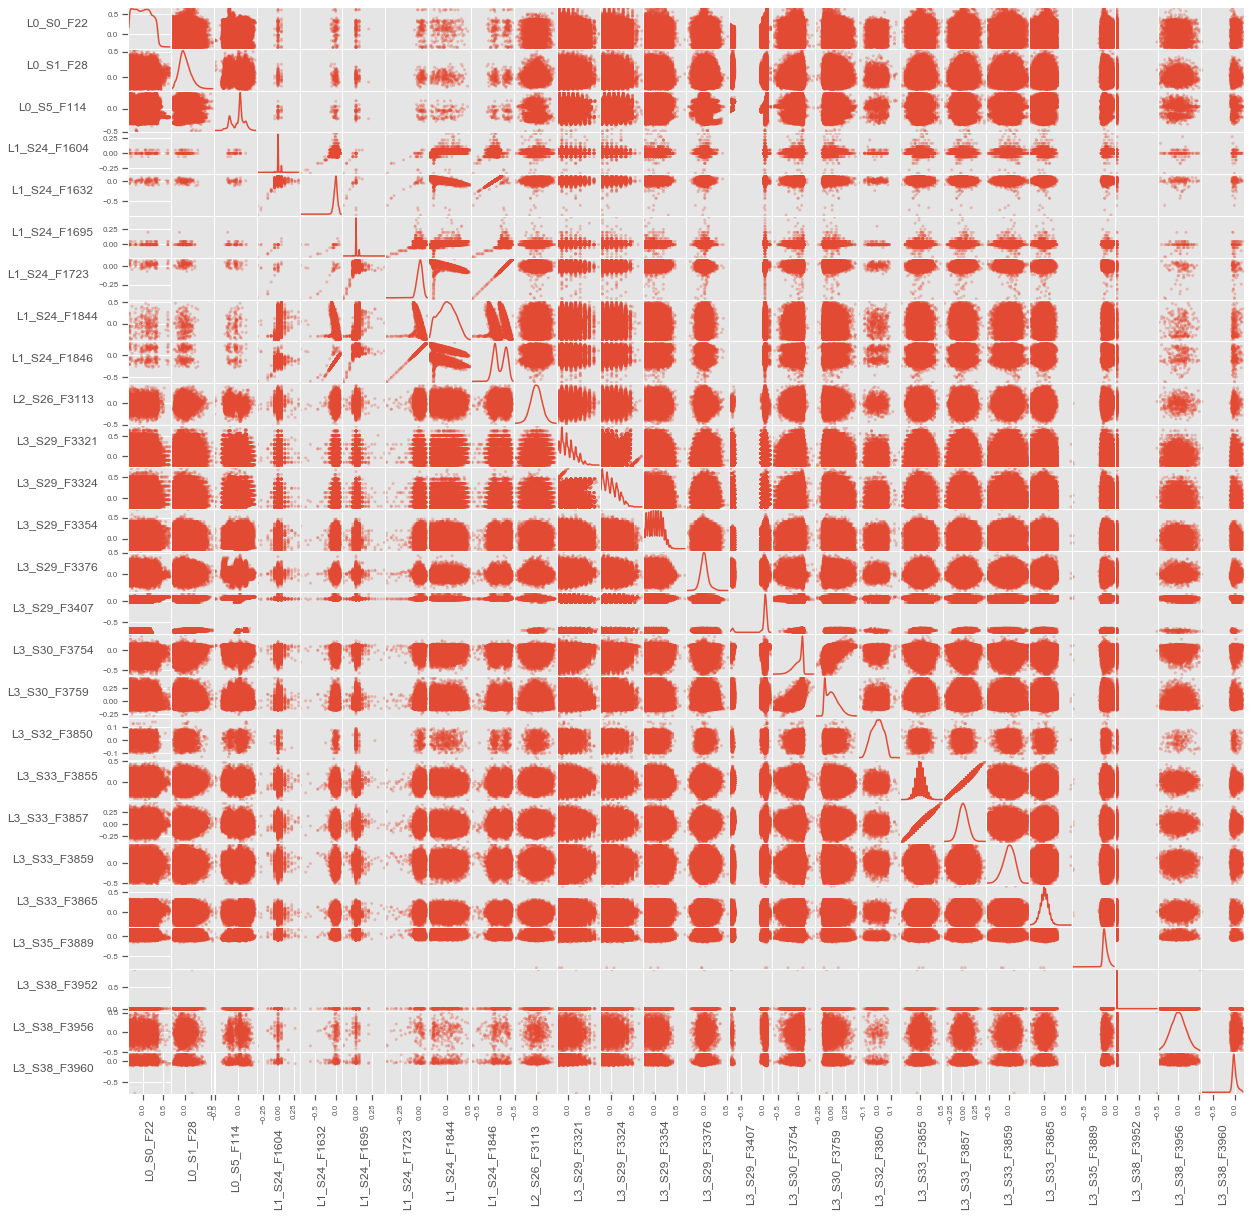

In [14]:
import matplotlib
matplotlib.style.use('ggplot')
cols = [col for col in train.columns if col not in ['Response']]
axs = scatter_matrix(train[cols], alpha = 0.3, 
                  figsize = (20,20), 
                  diagonal = 'kde', 
#                  marker='x', 
#                  c=train.Response.apply(lambda x:colors[x]),
)
n = len(cols)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

C:\Users\Rezaul Abedin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


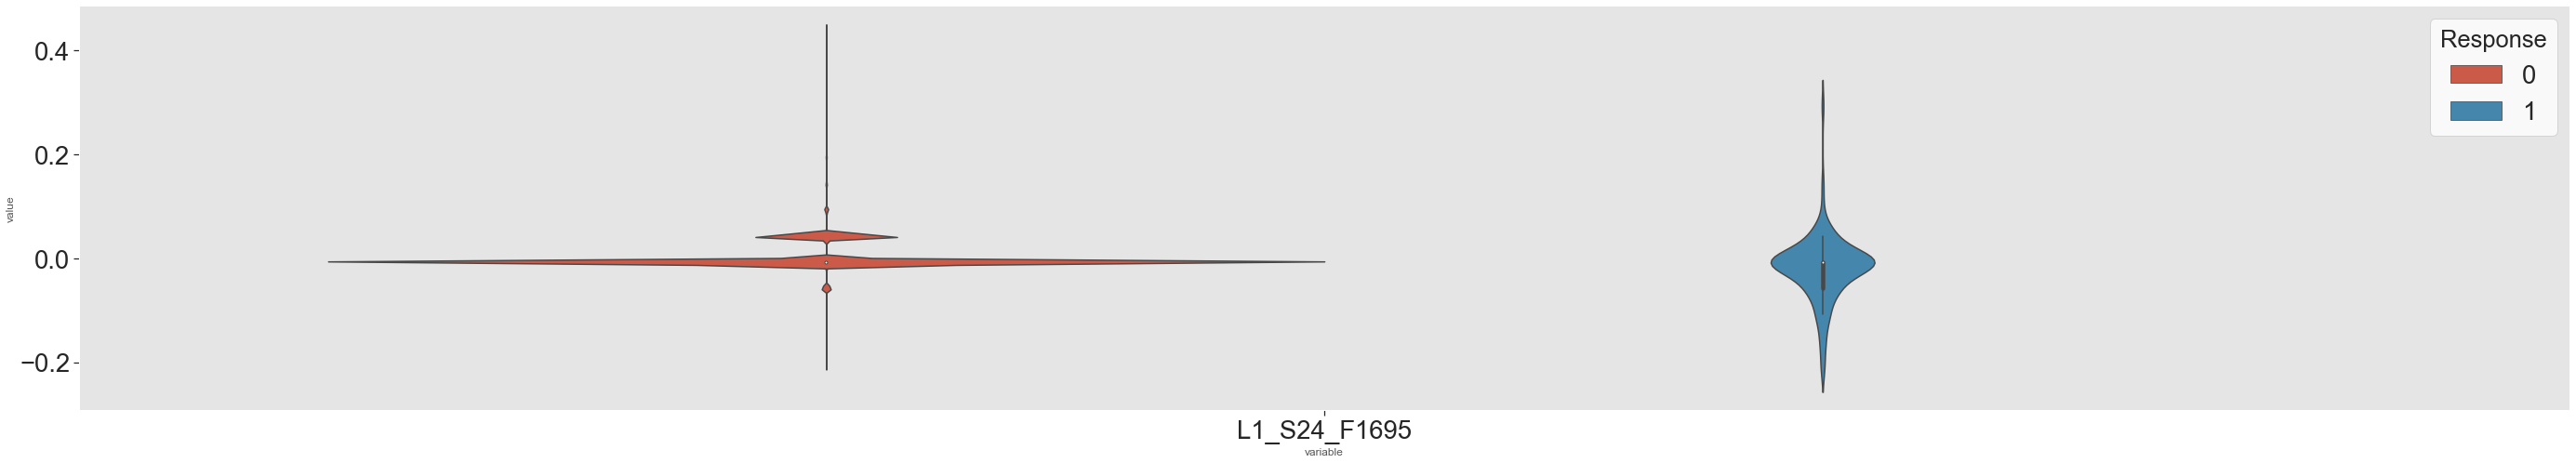

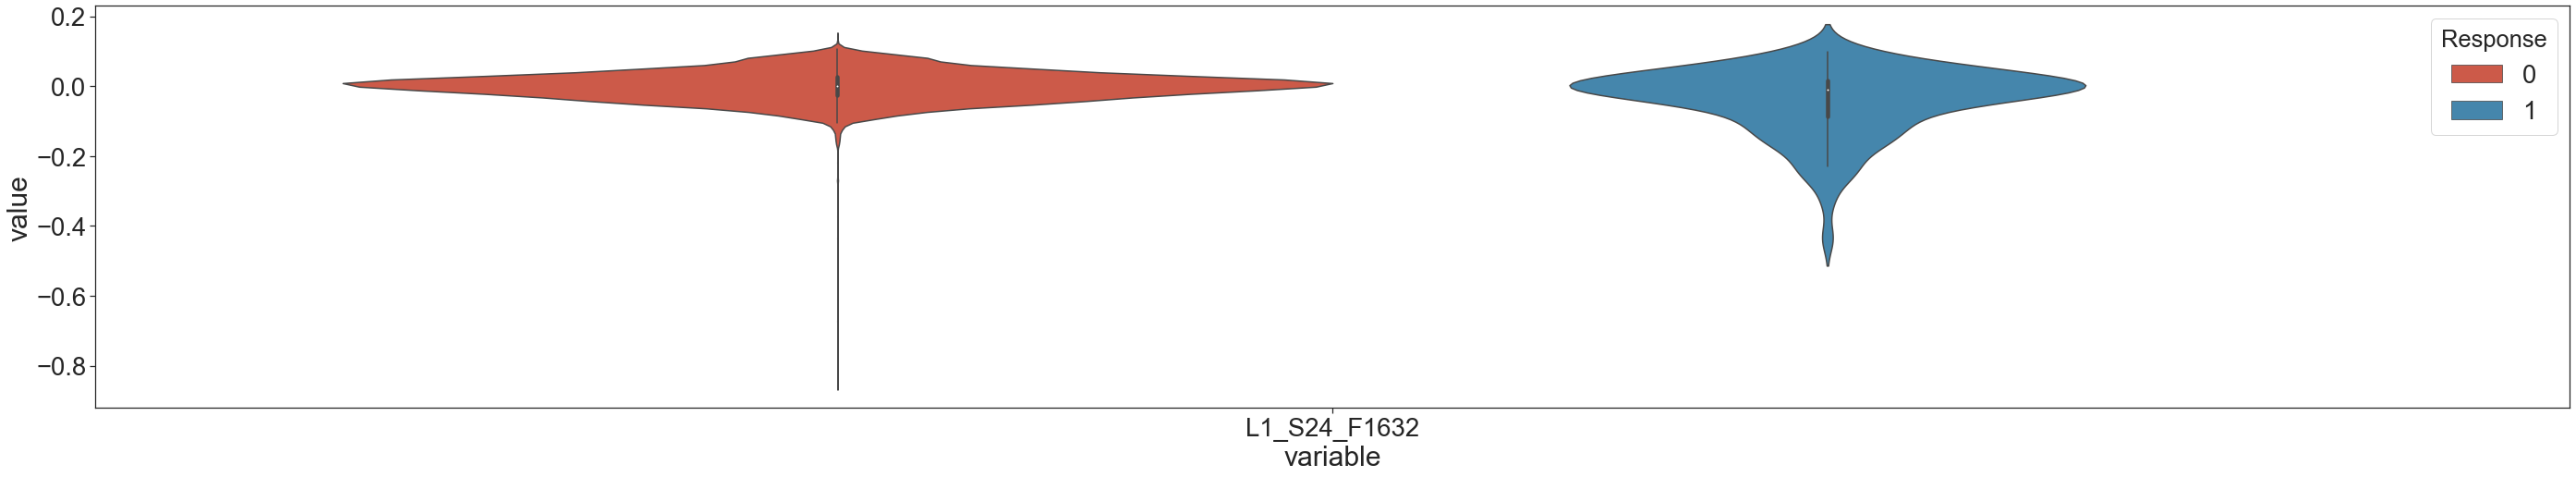

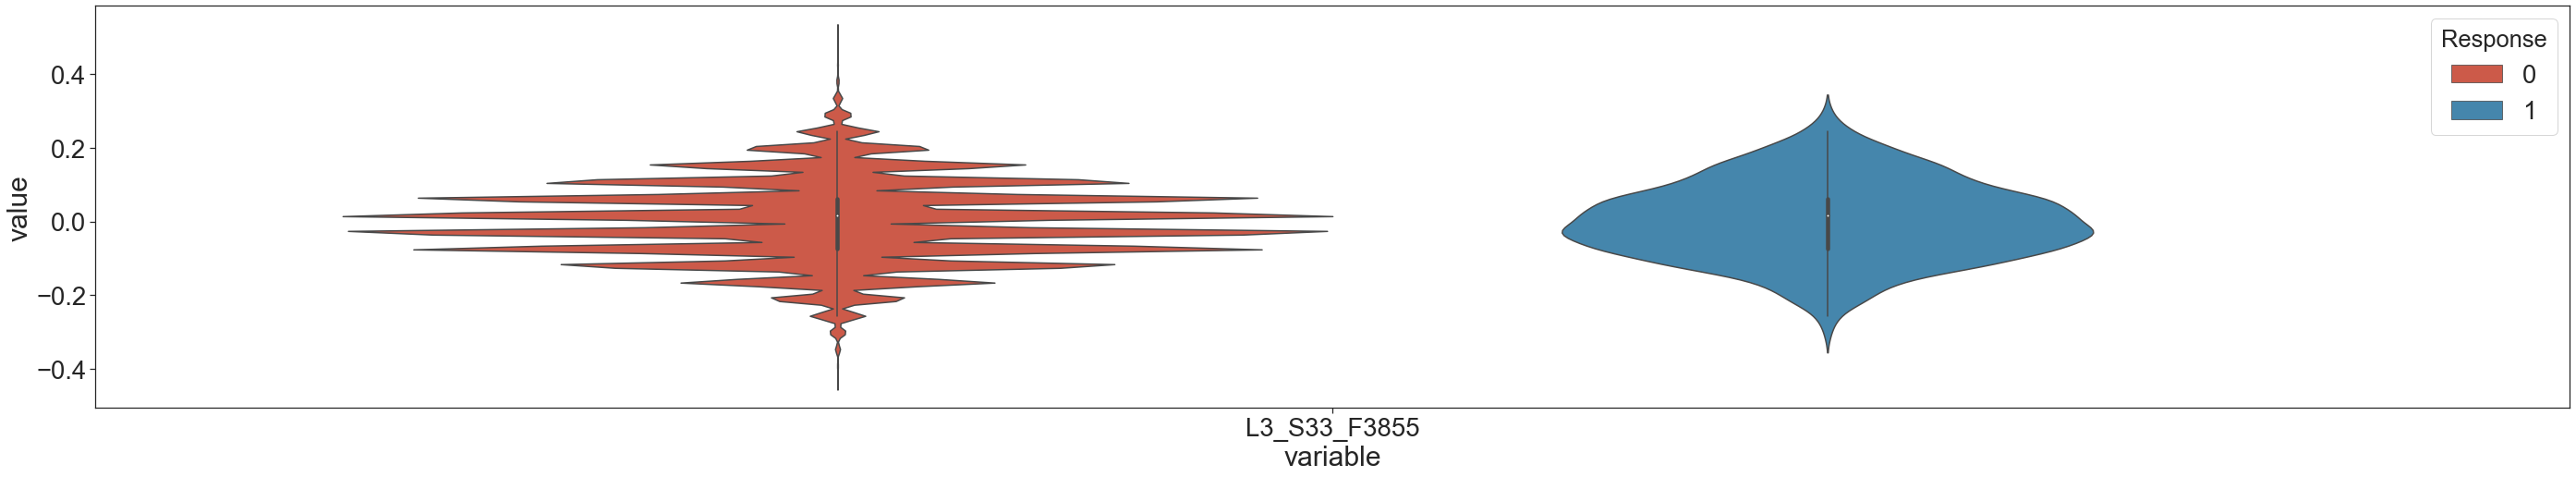

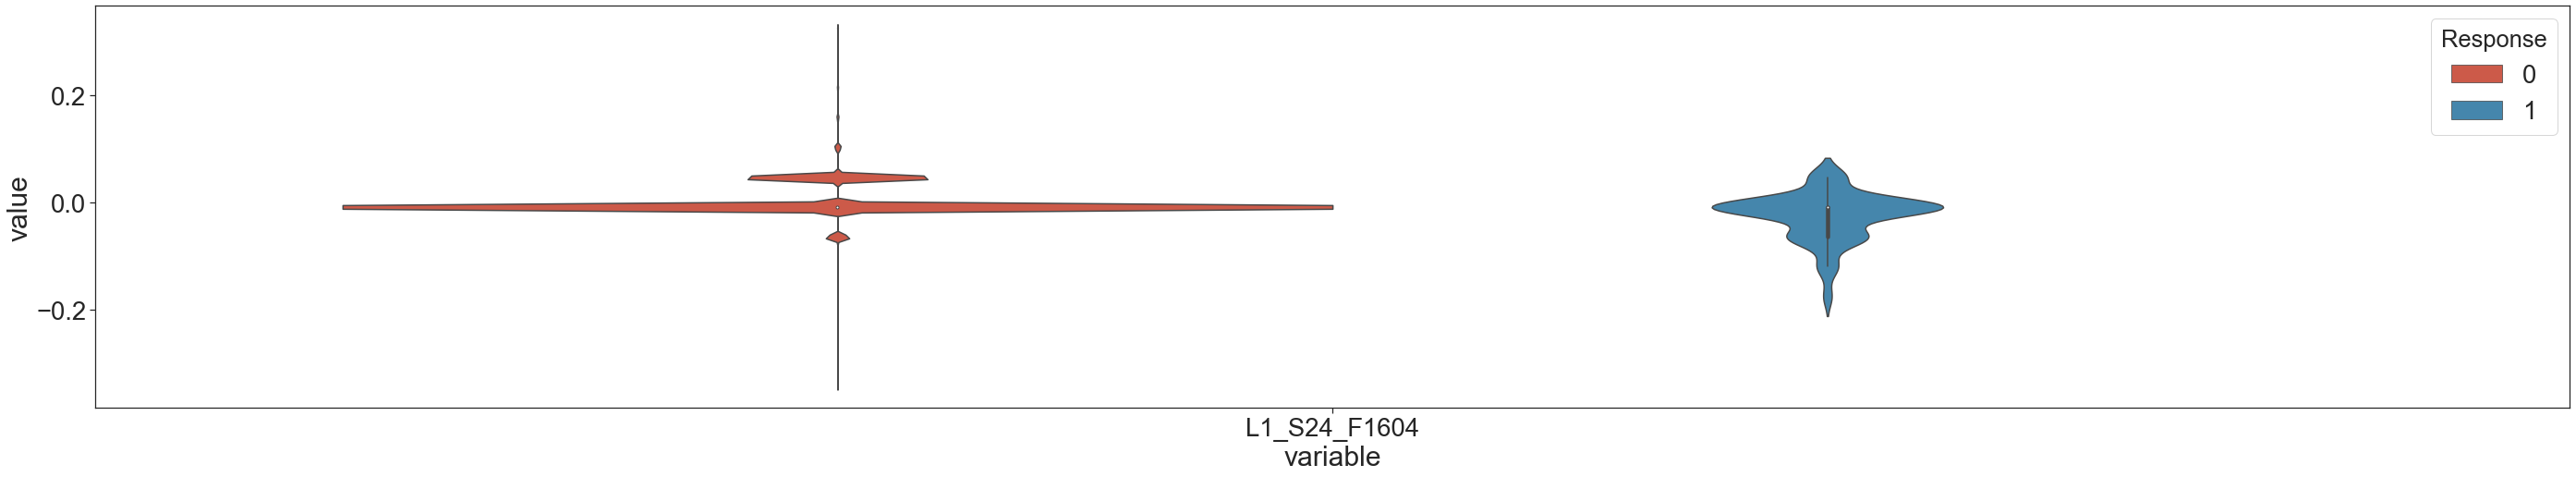

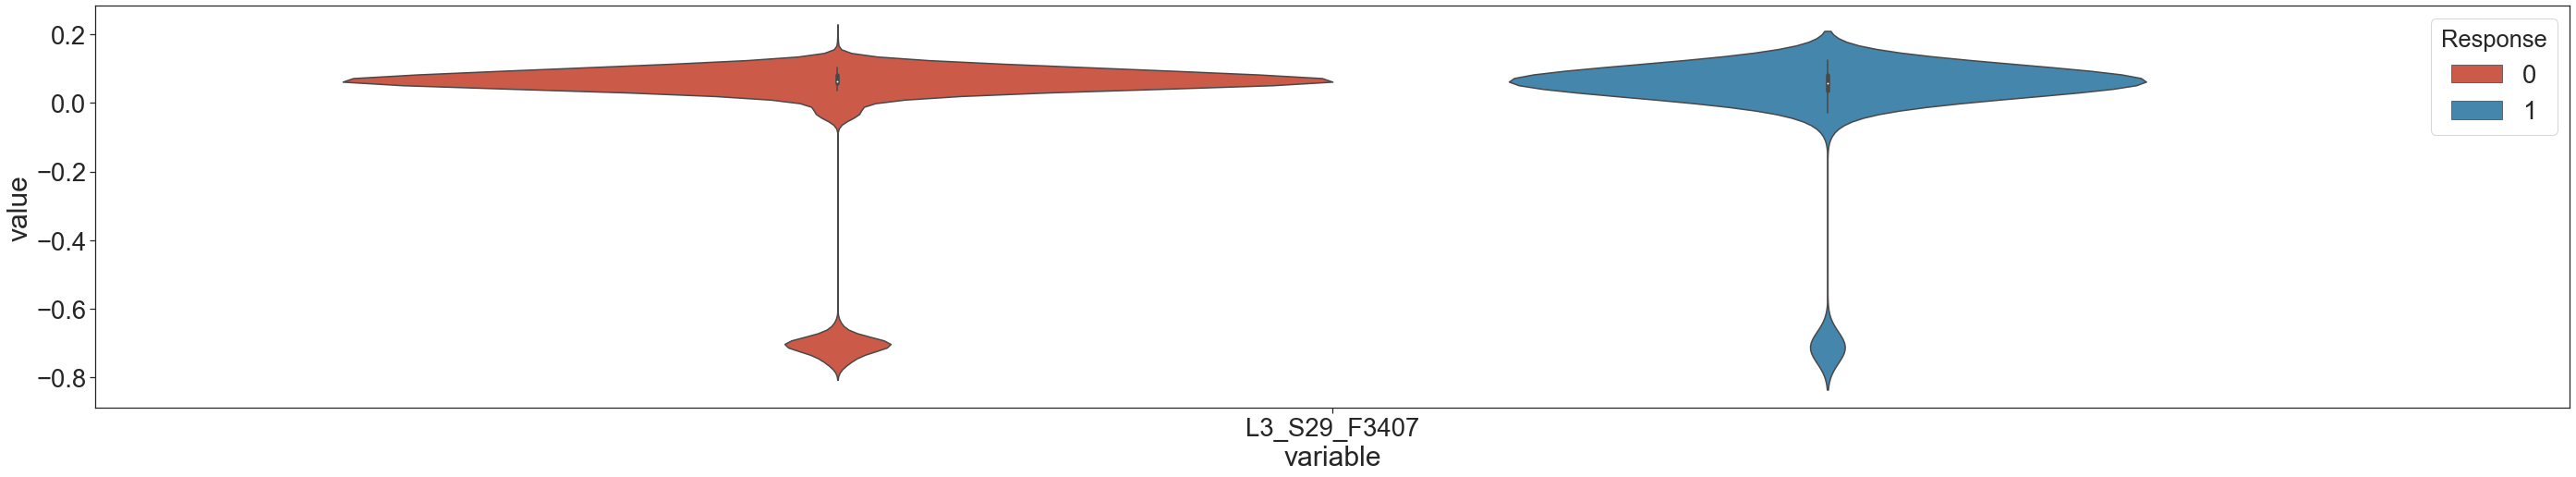

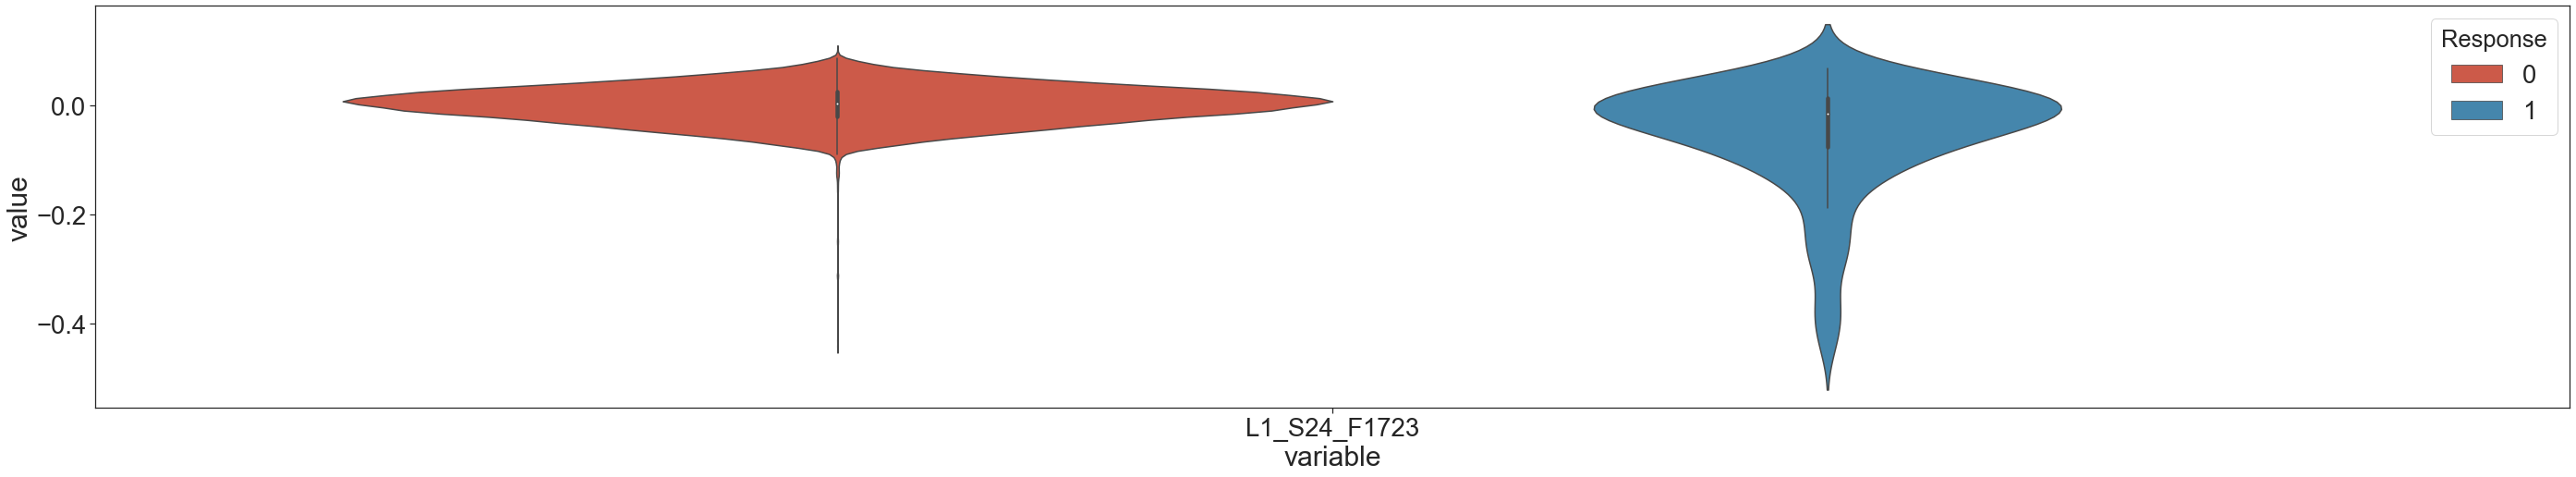

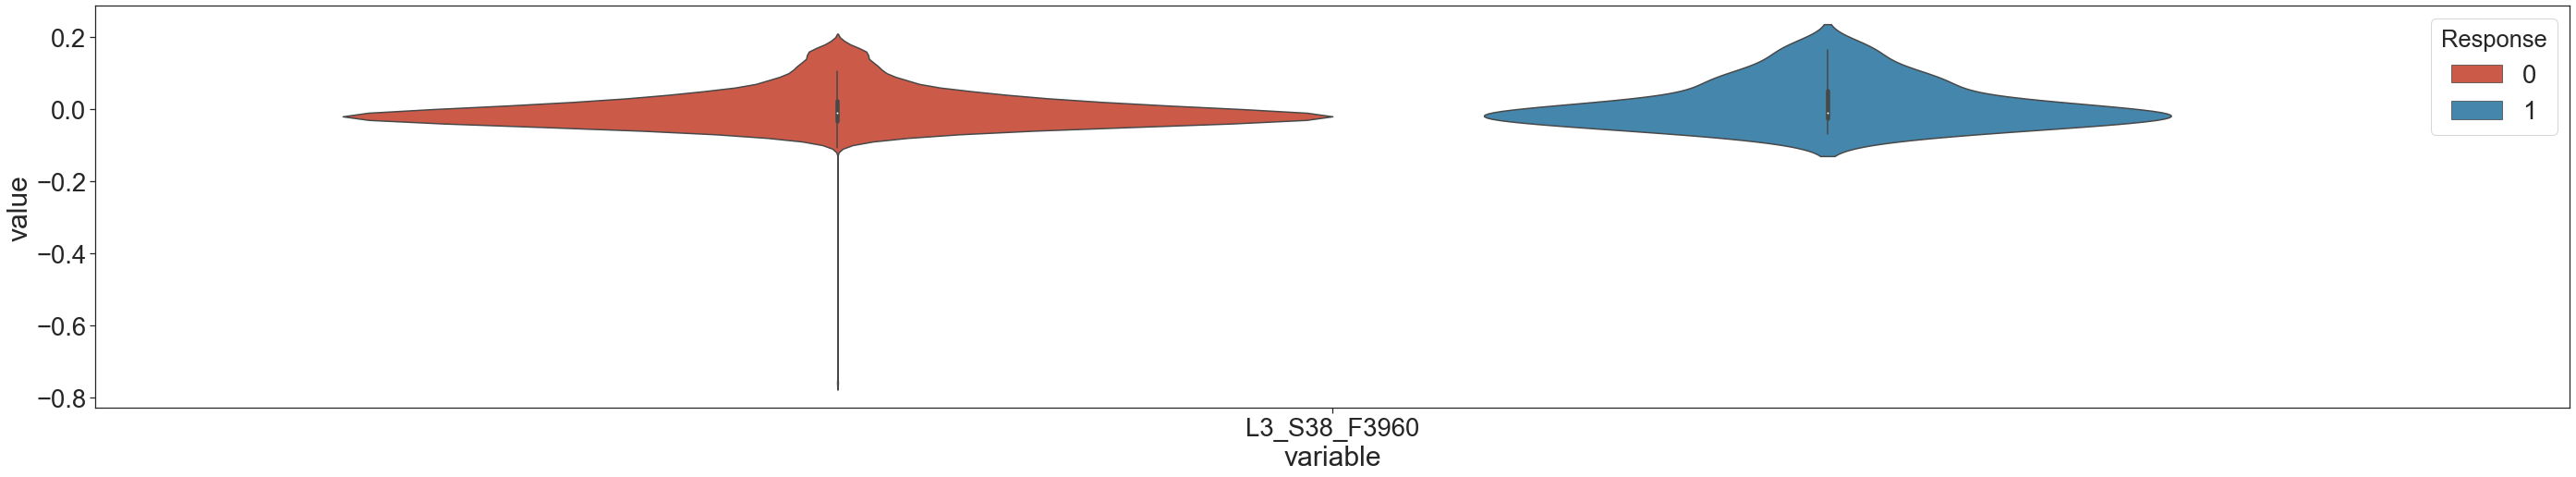

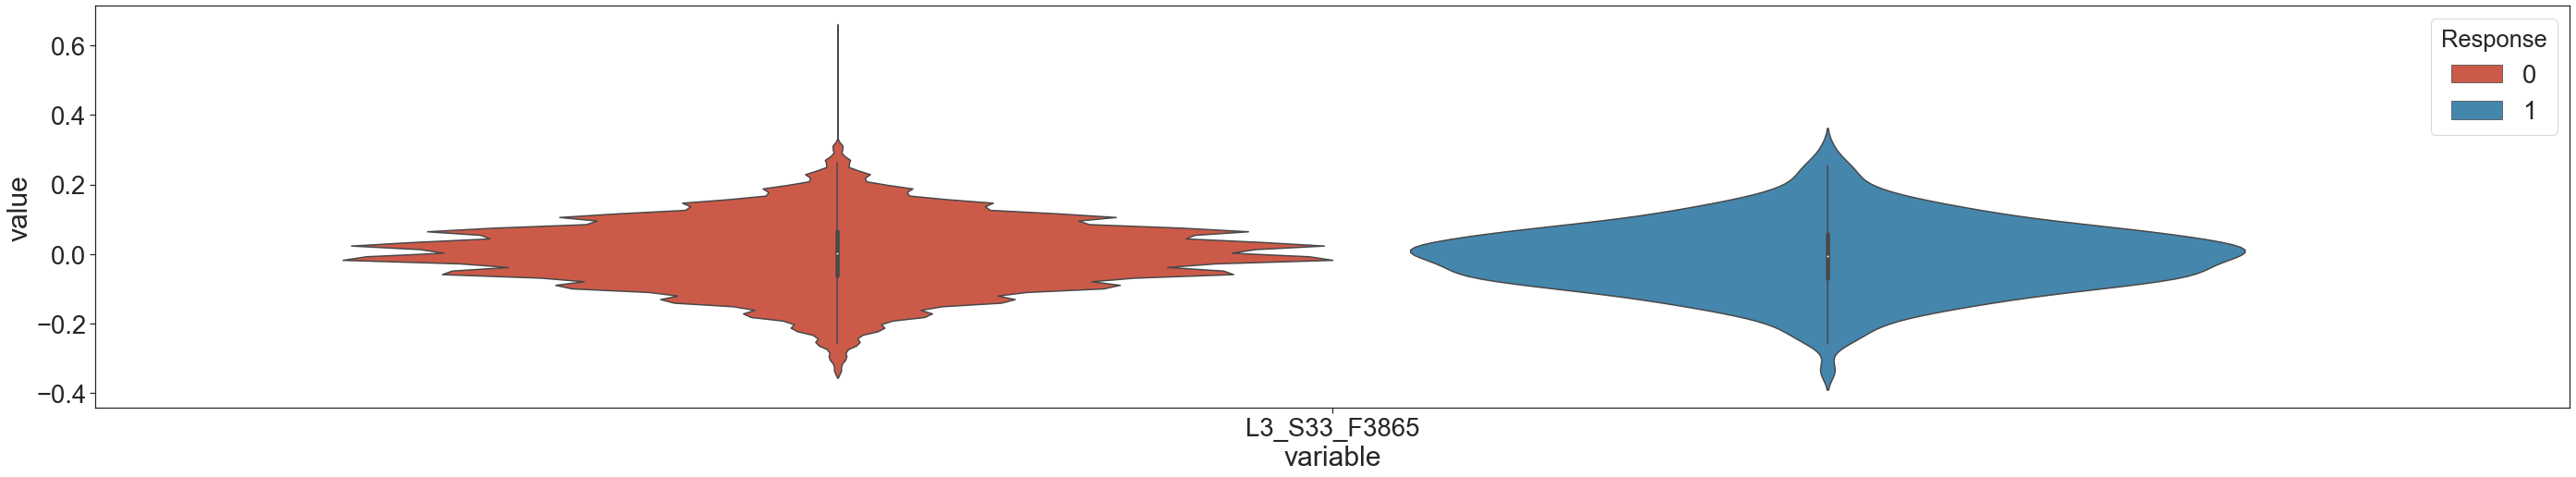

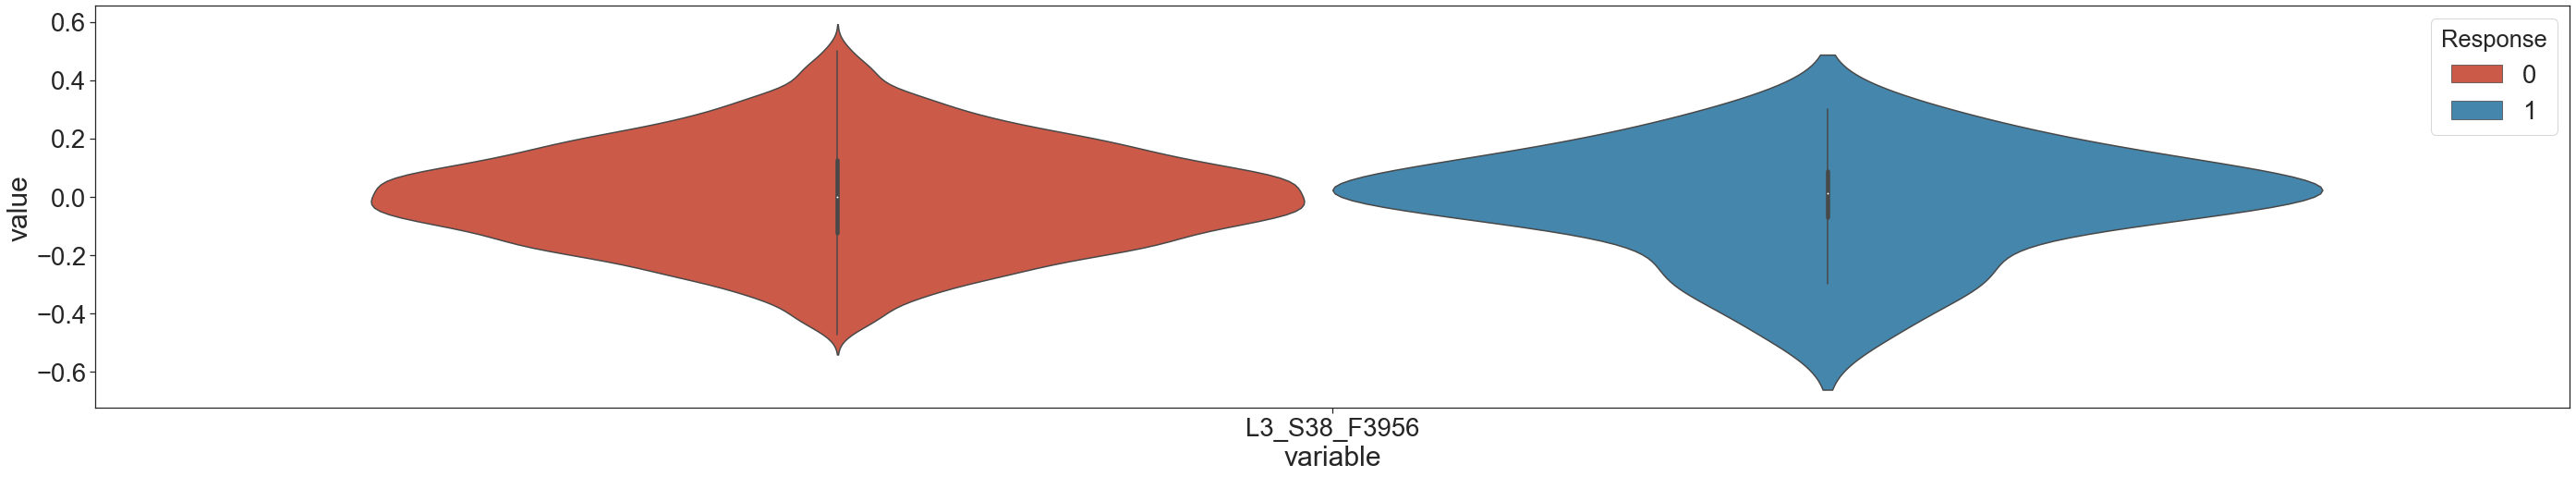

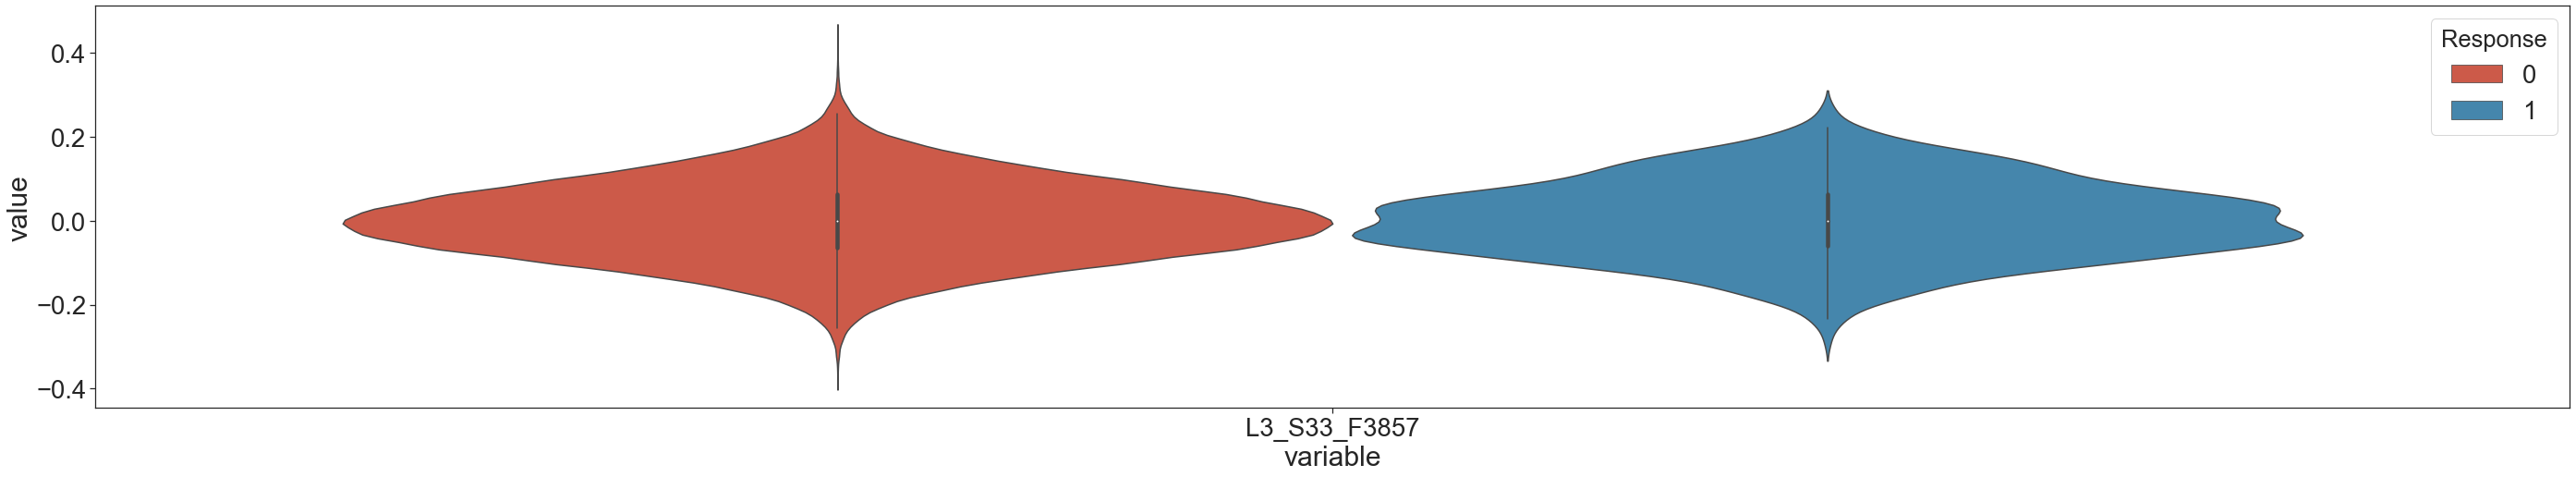

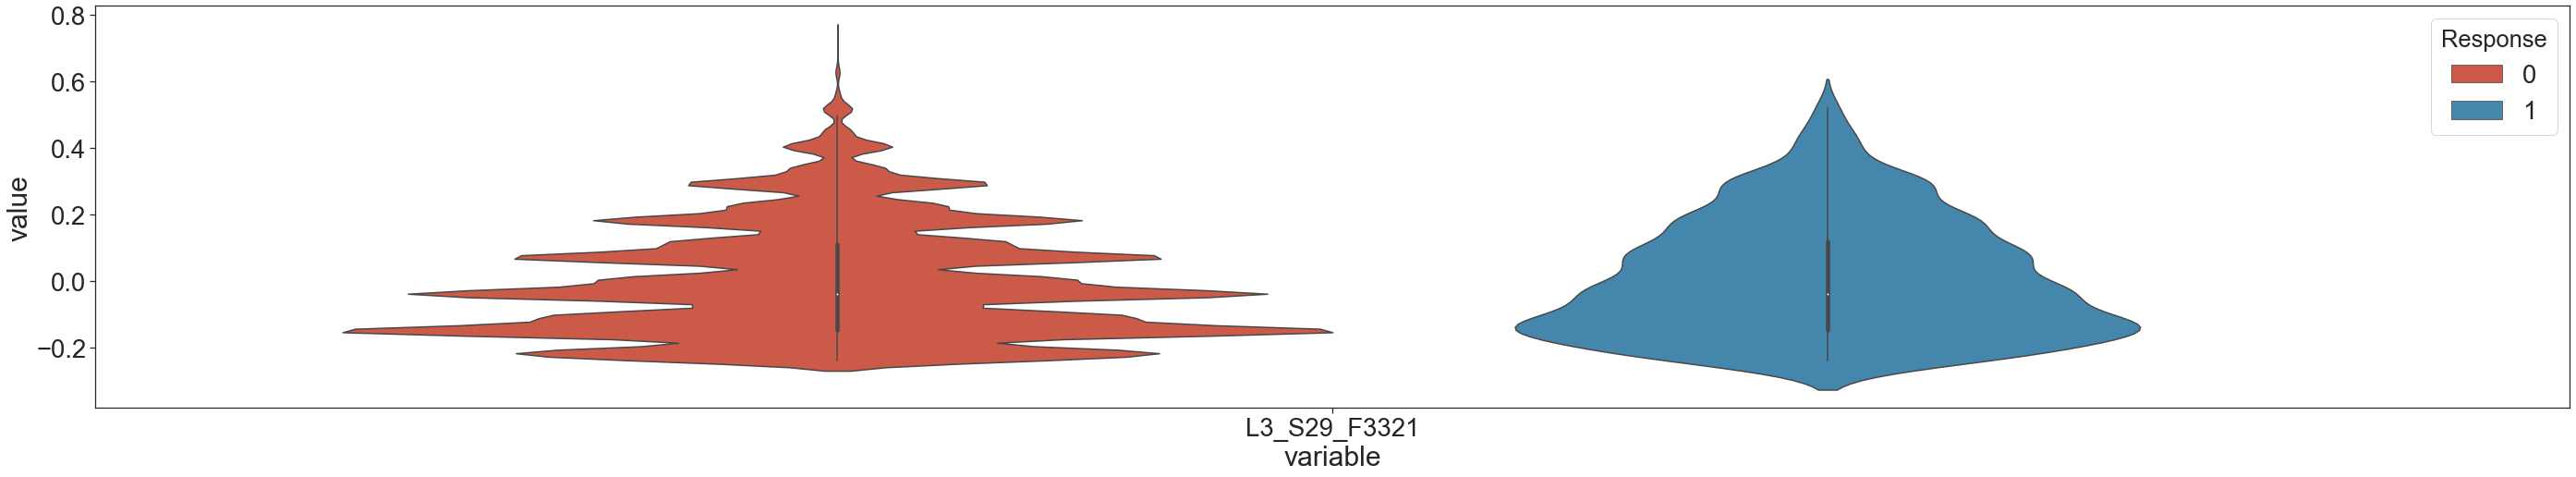

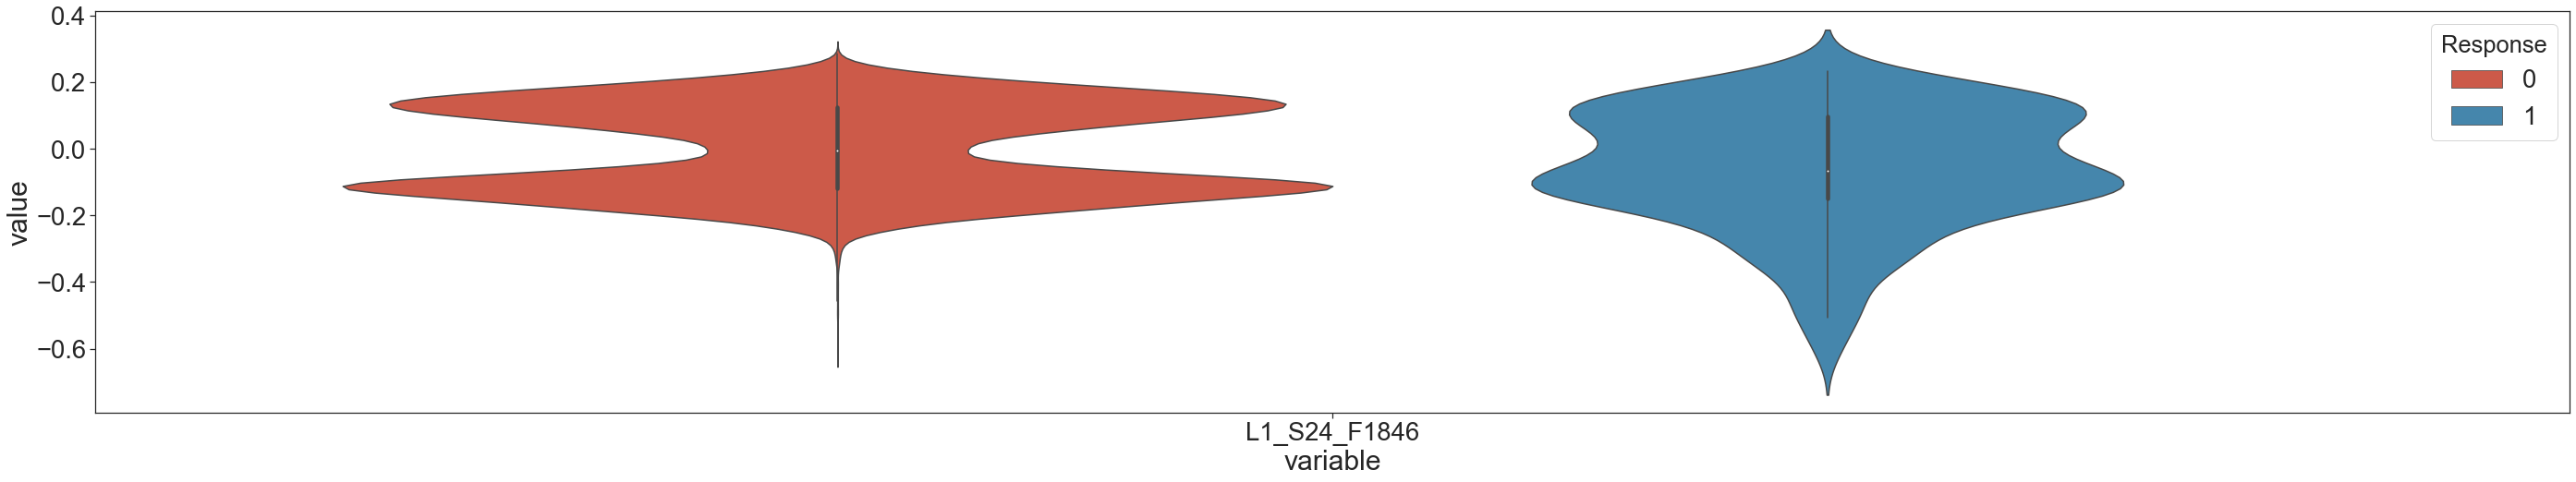

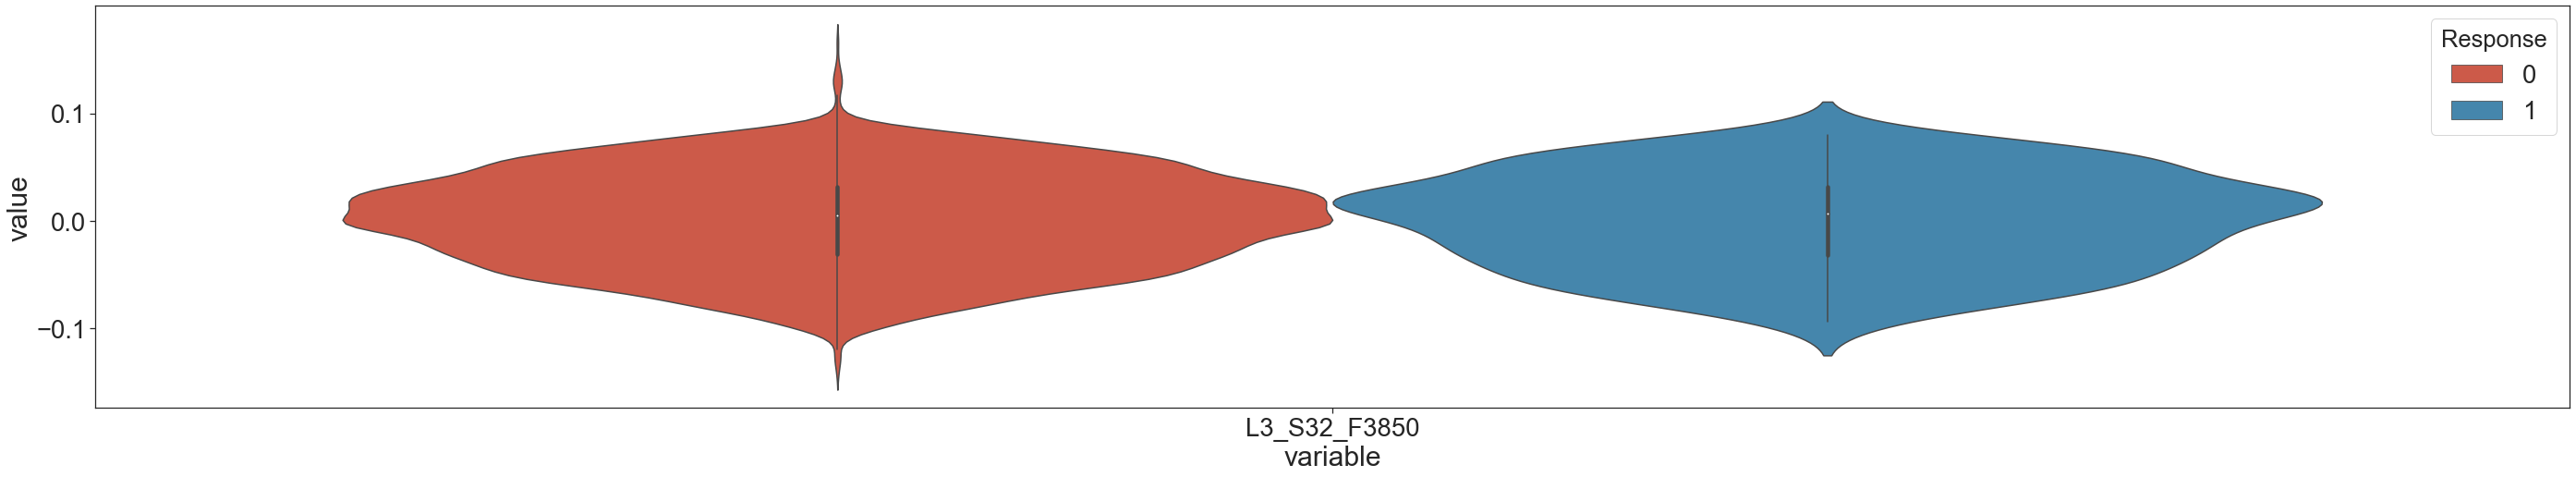

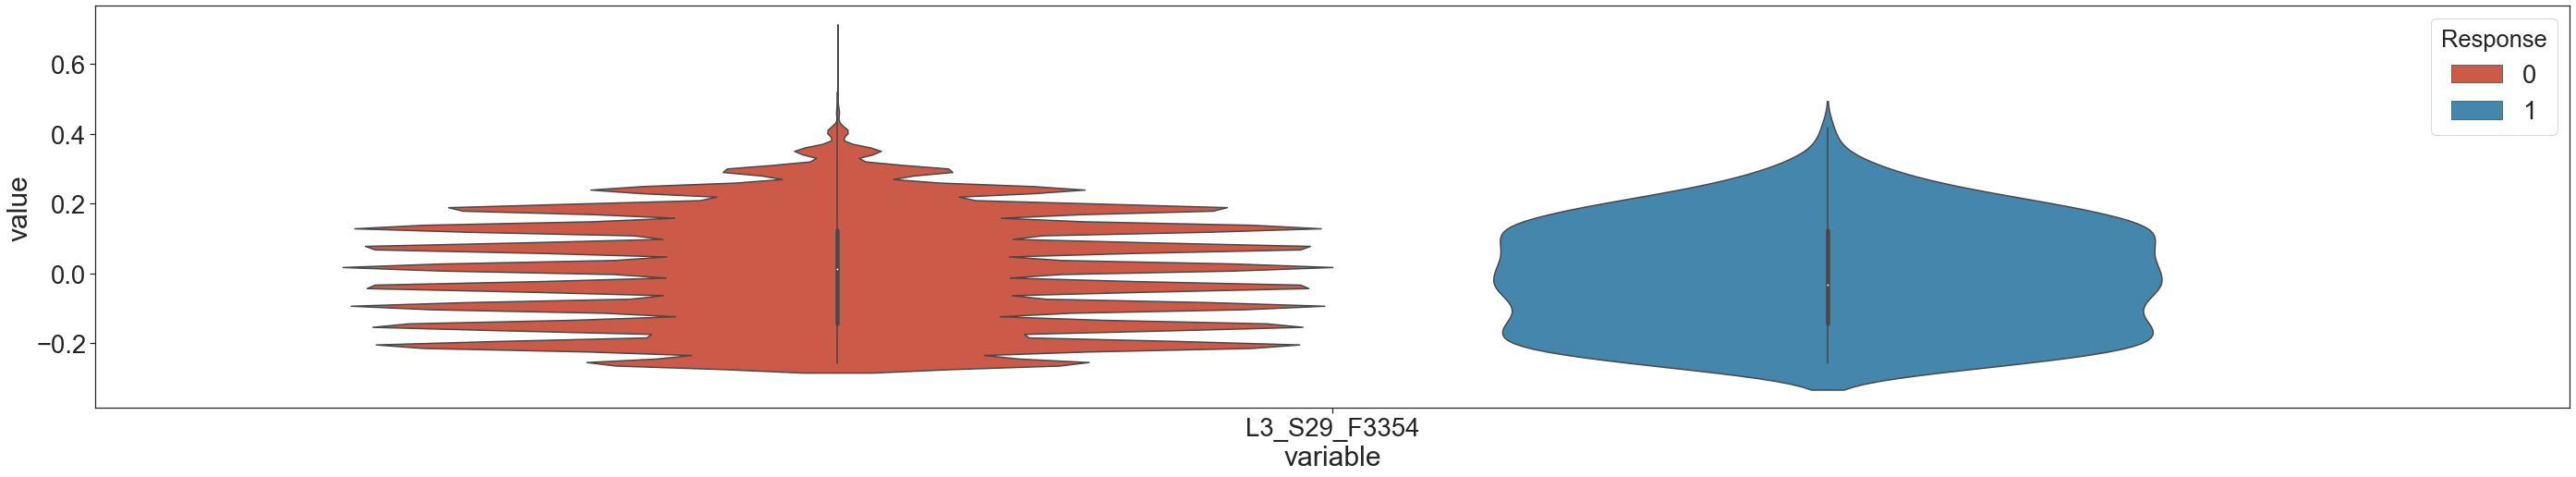

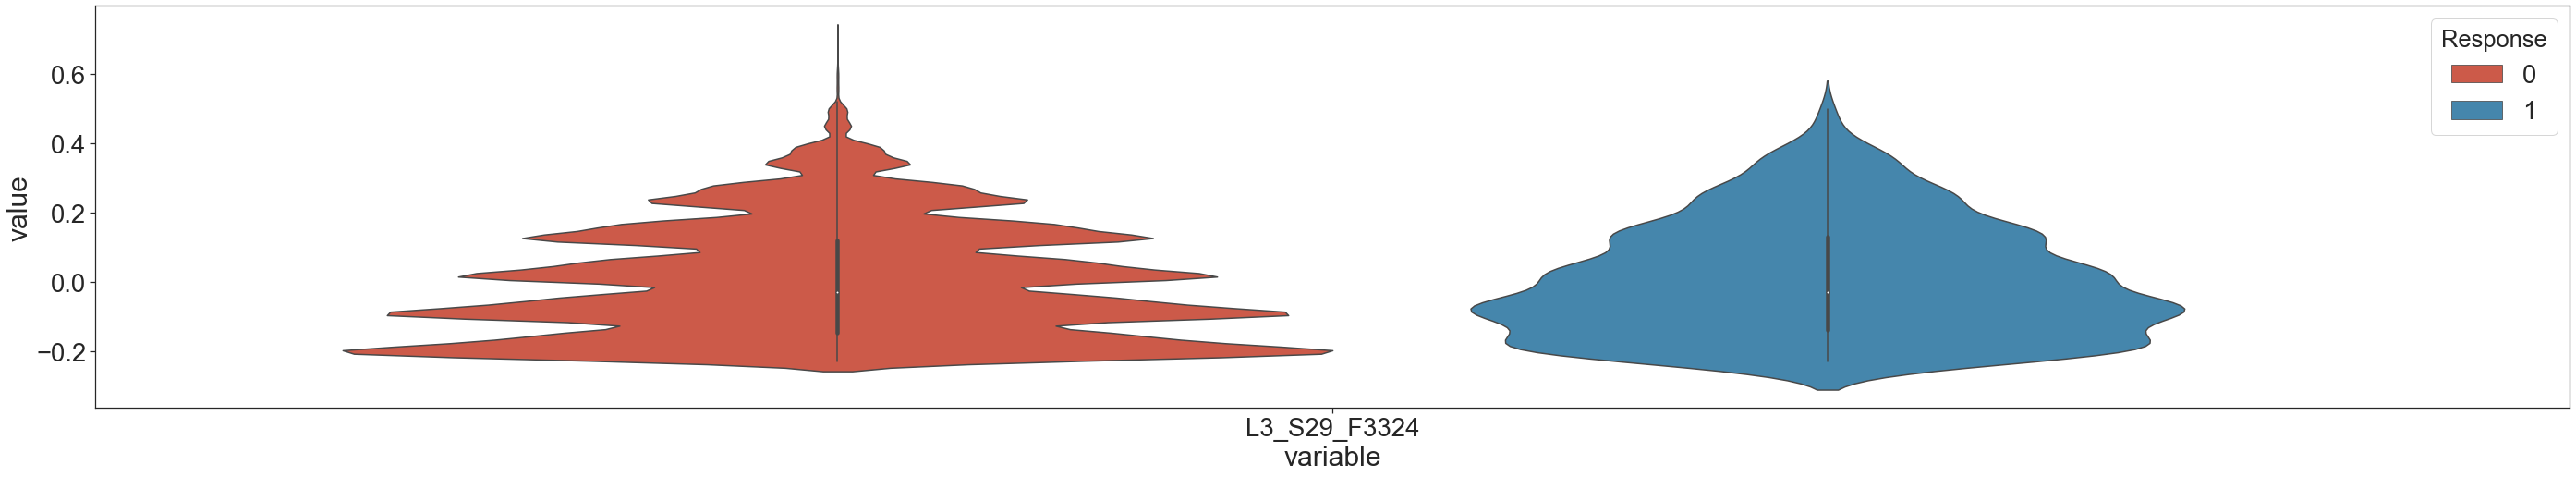

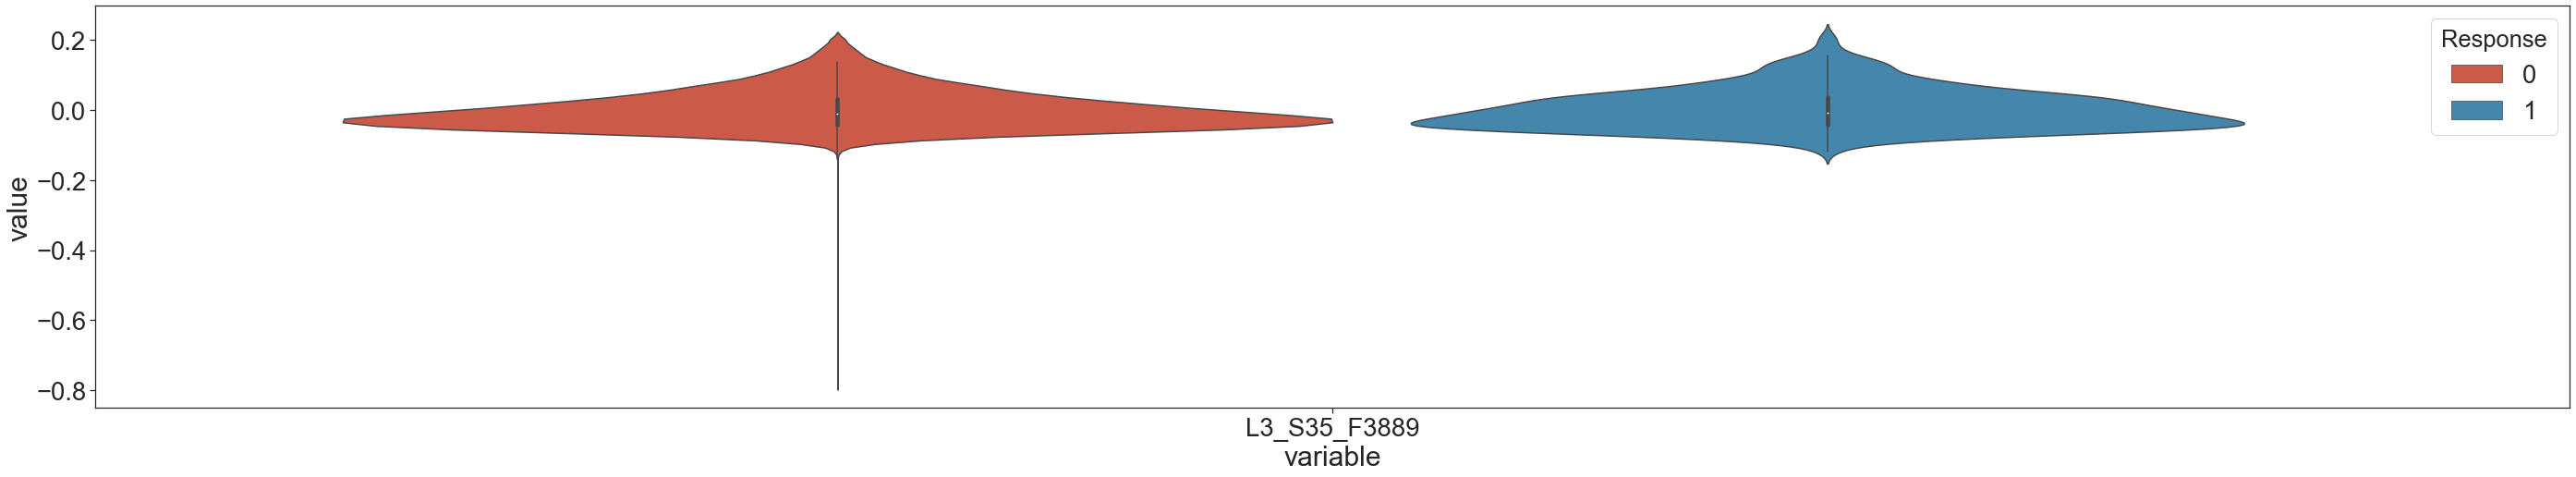

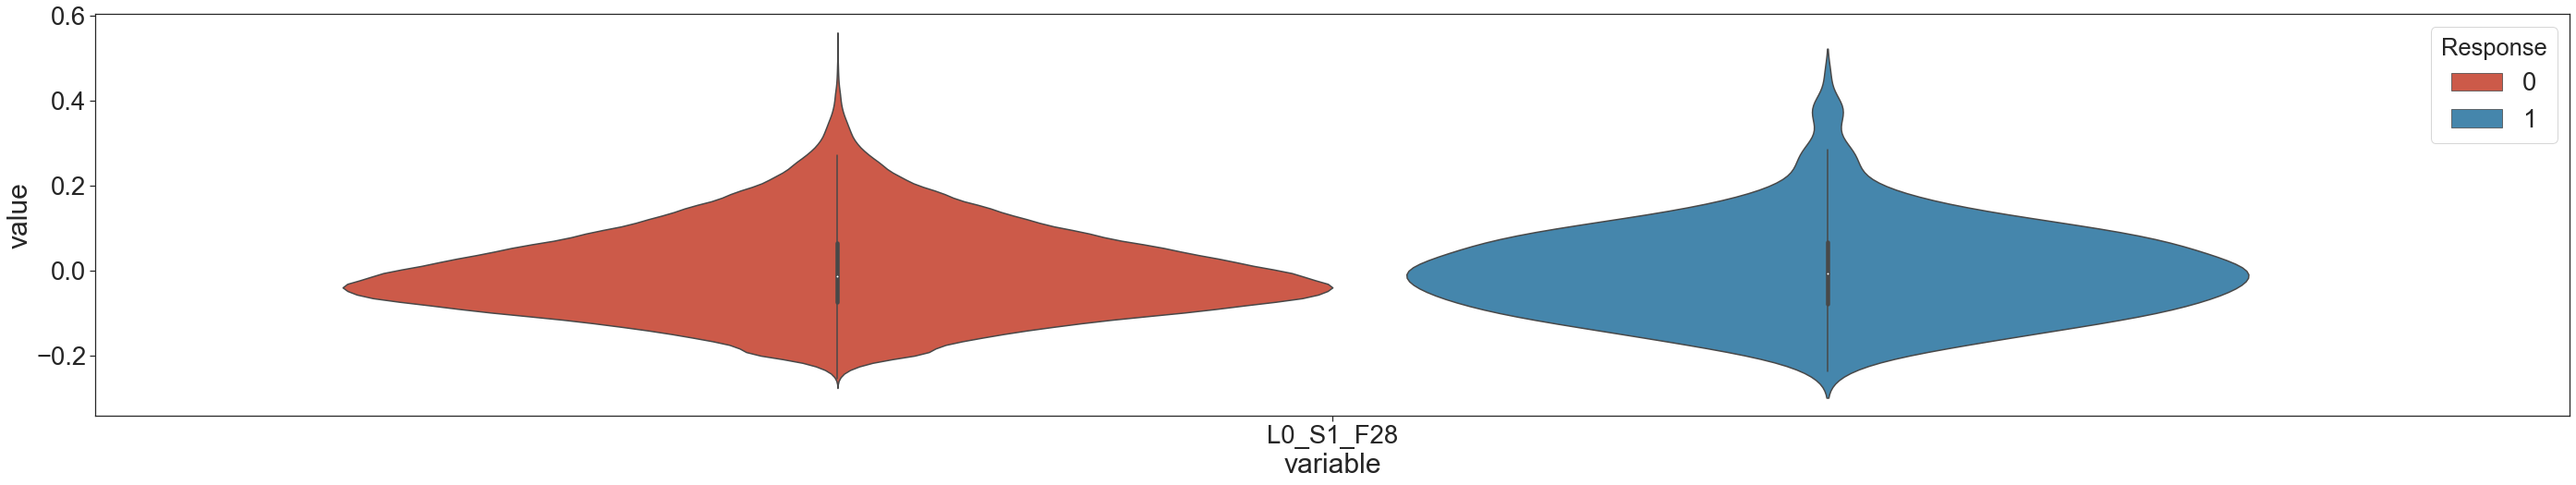

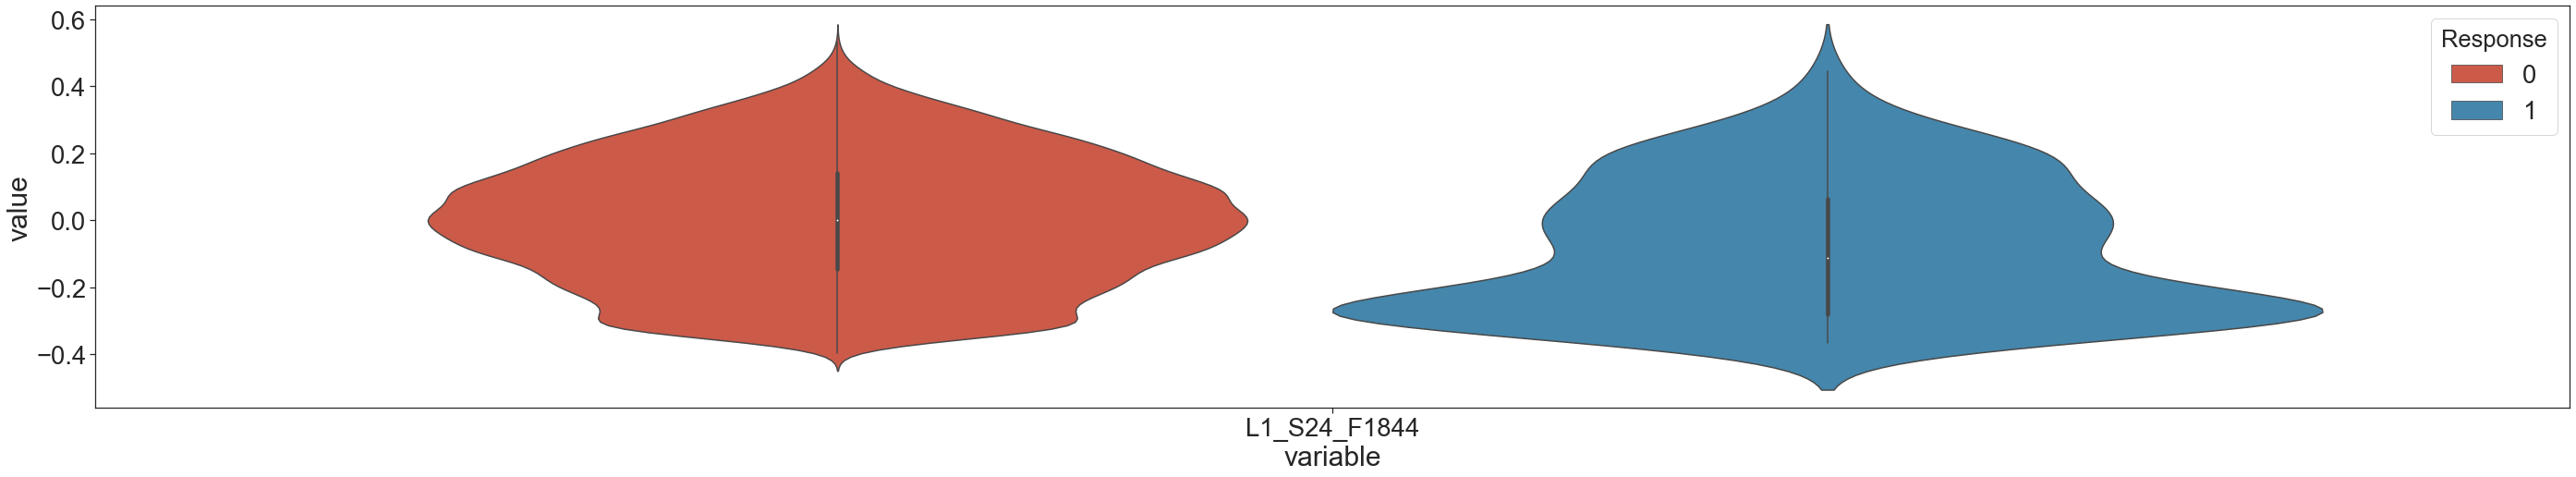

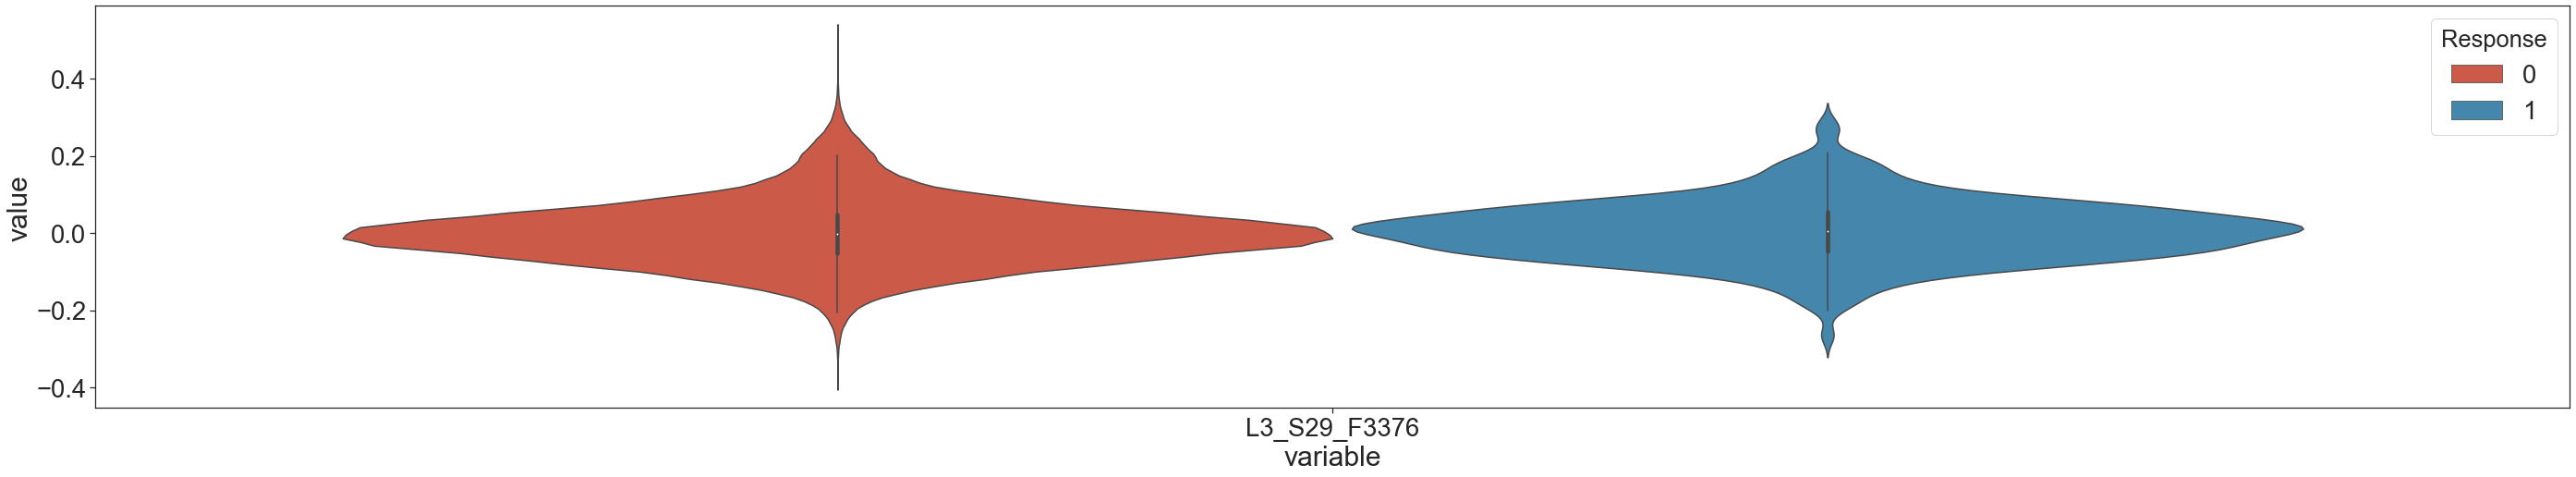

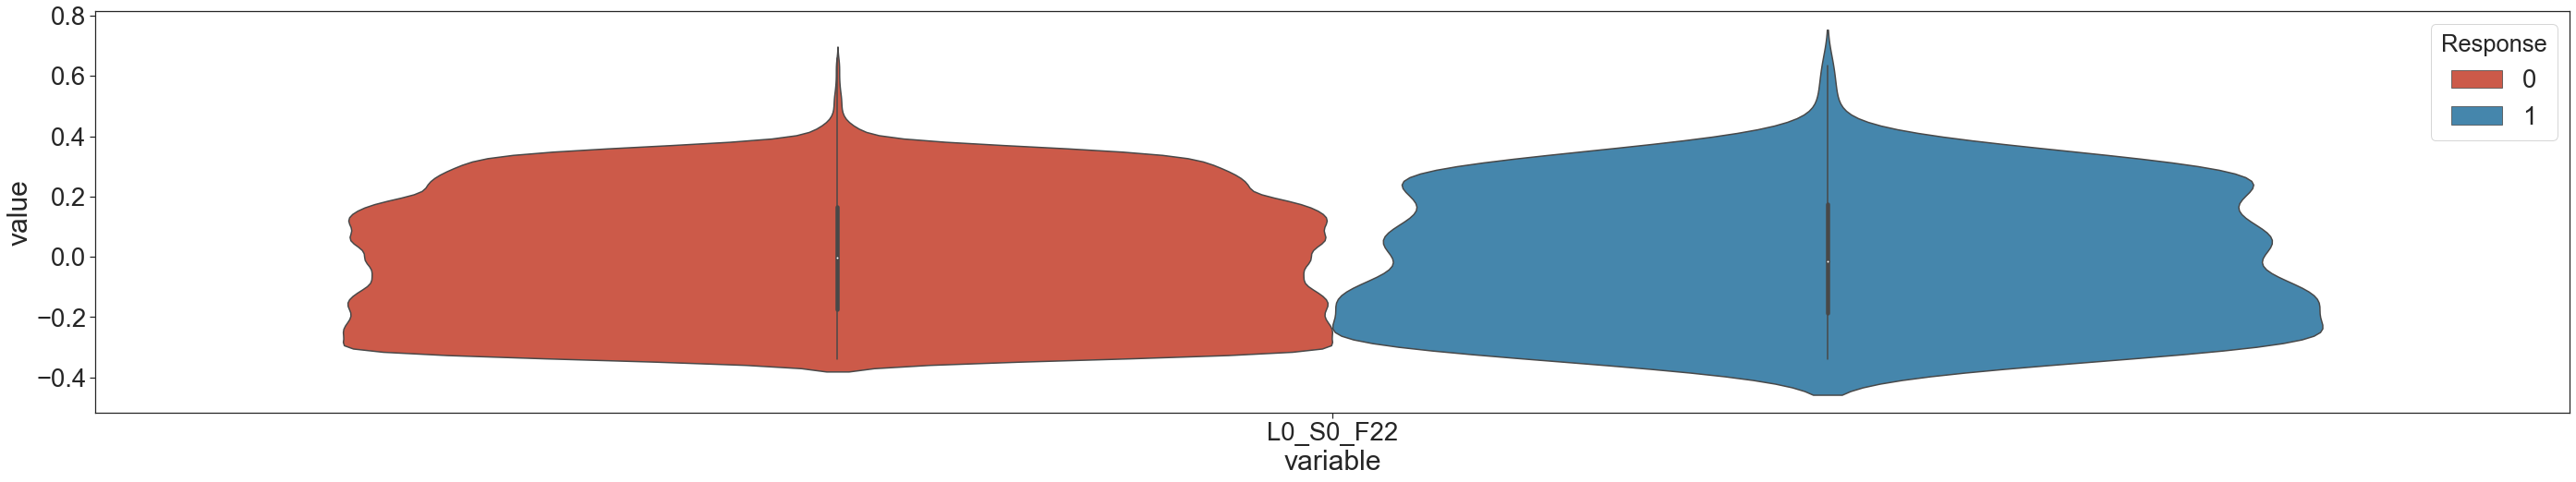

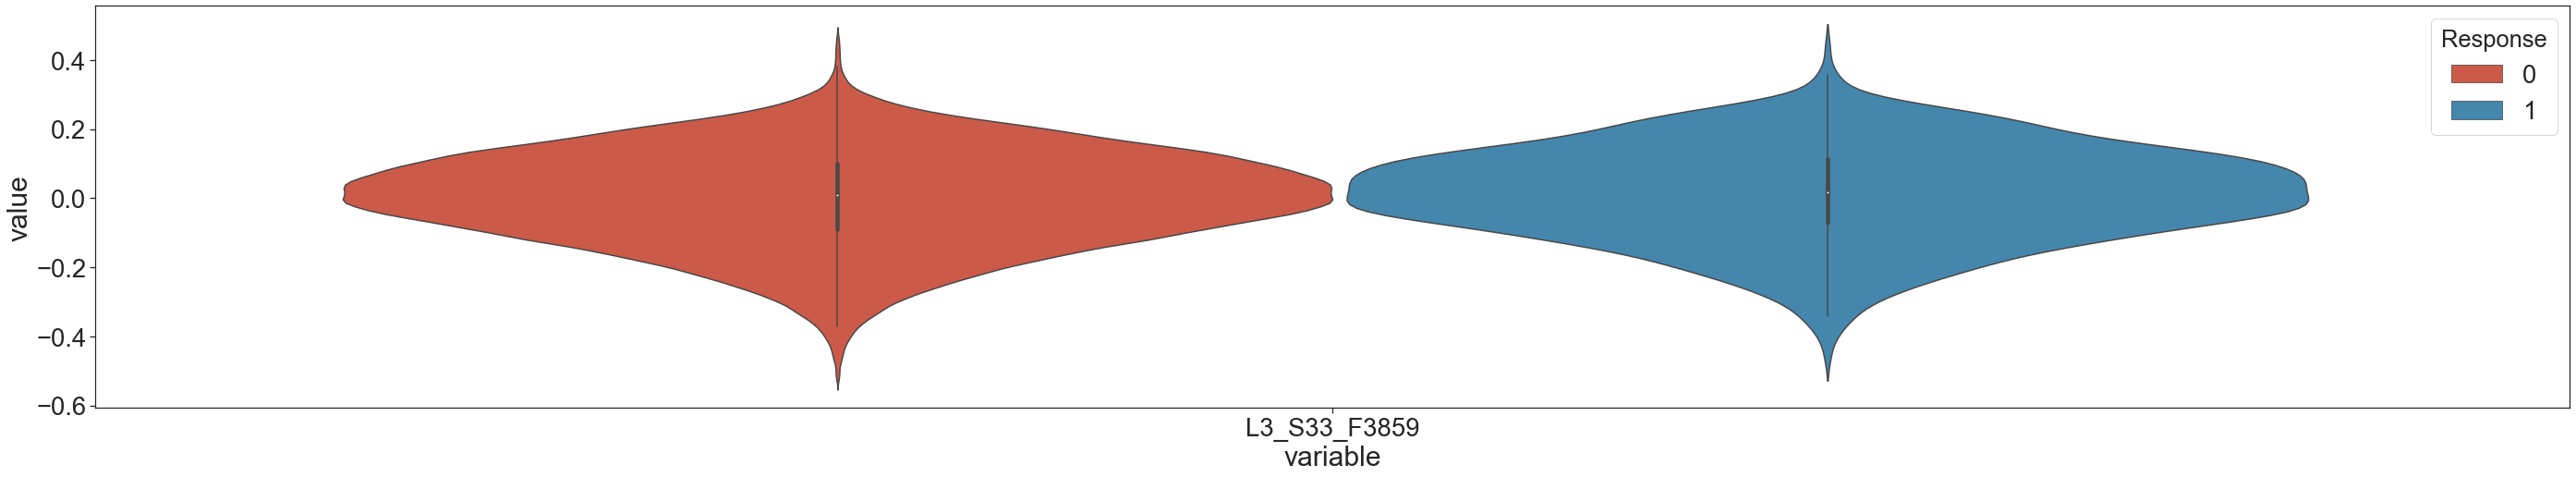

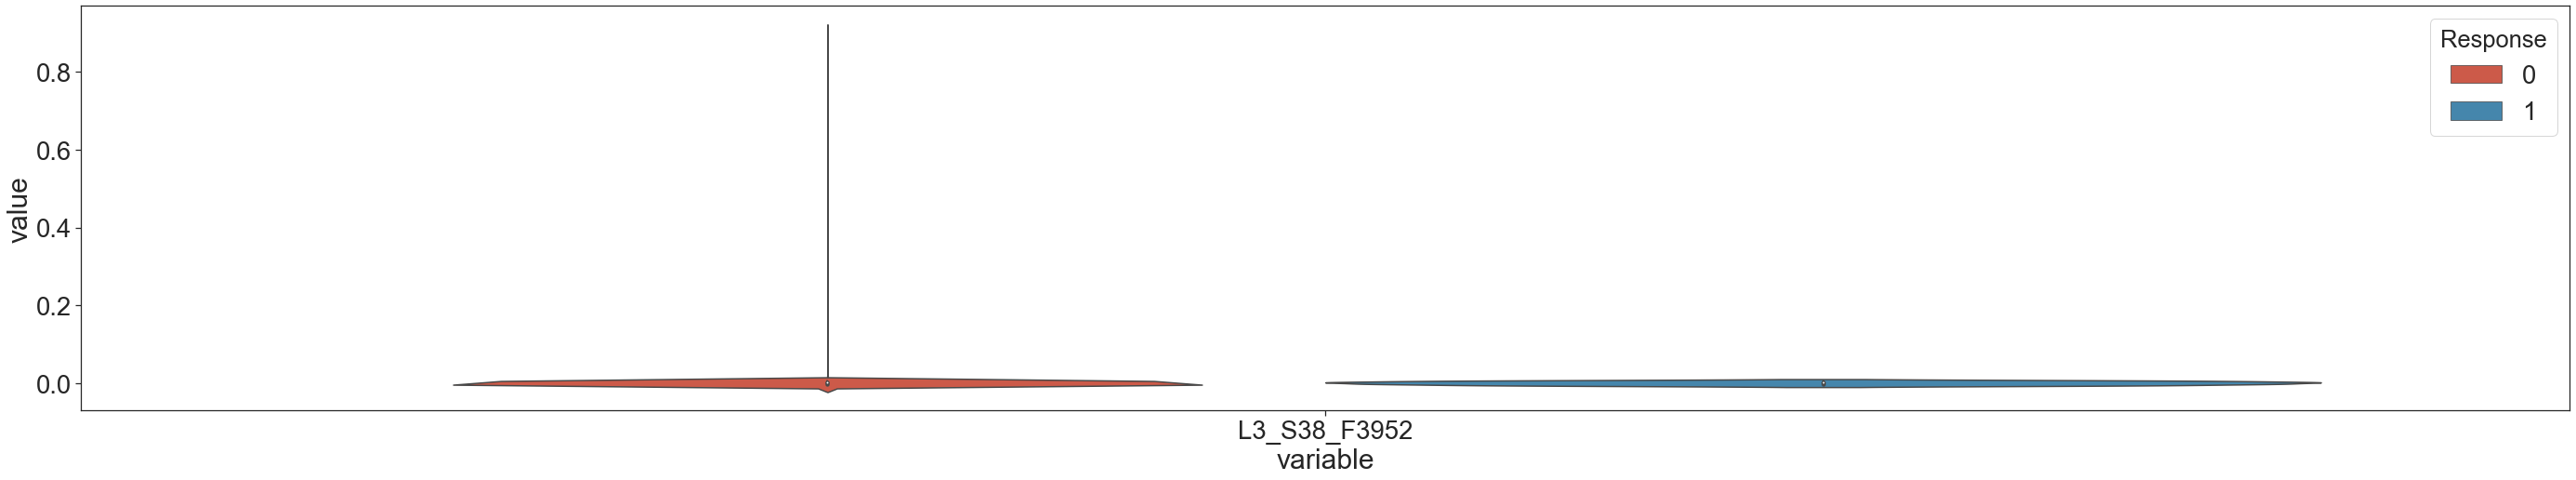

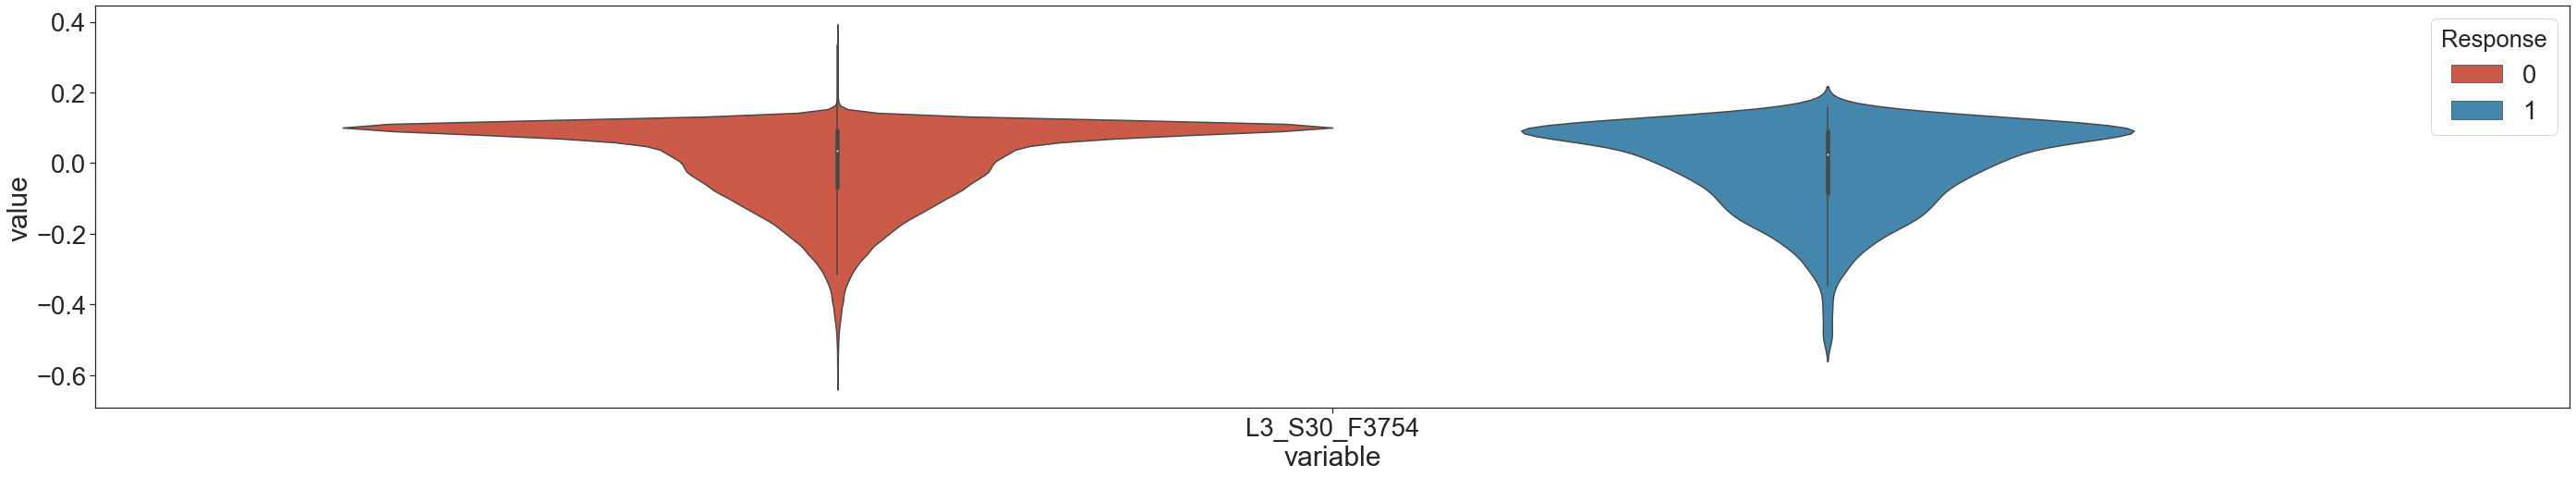

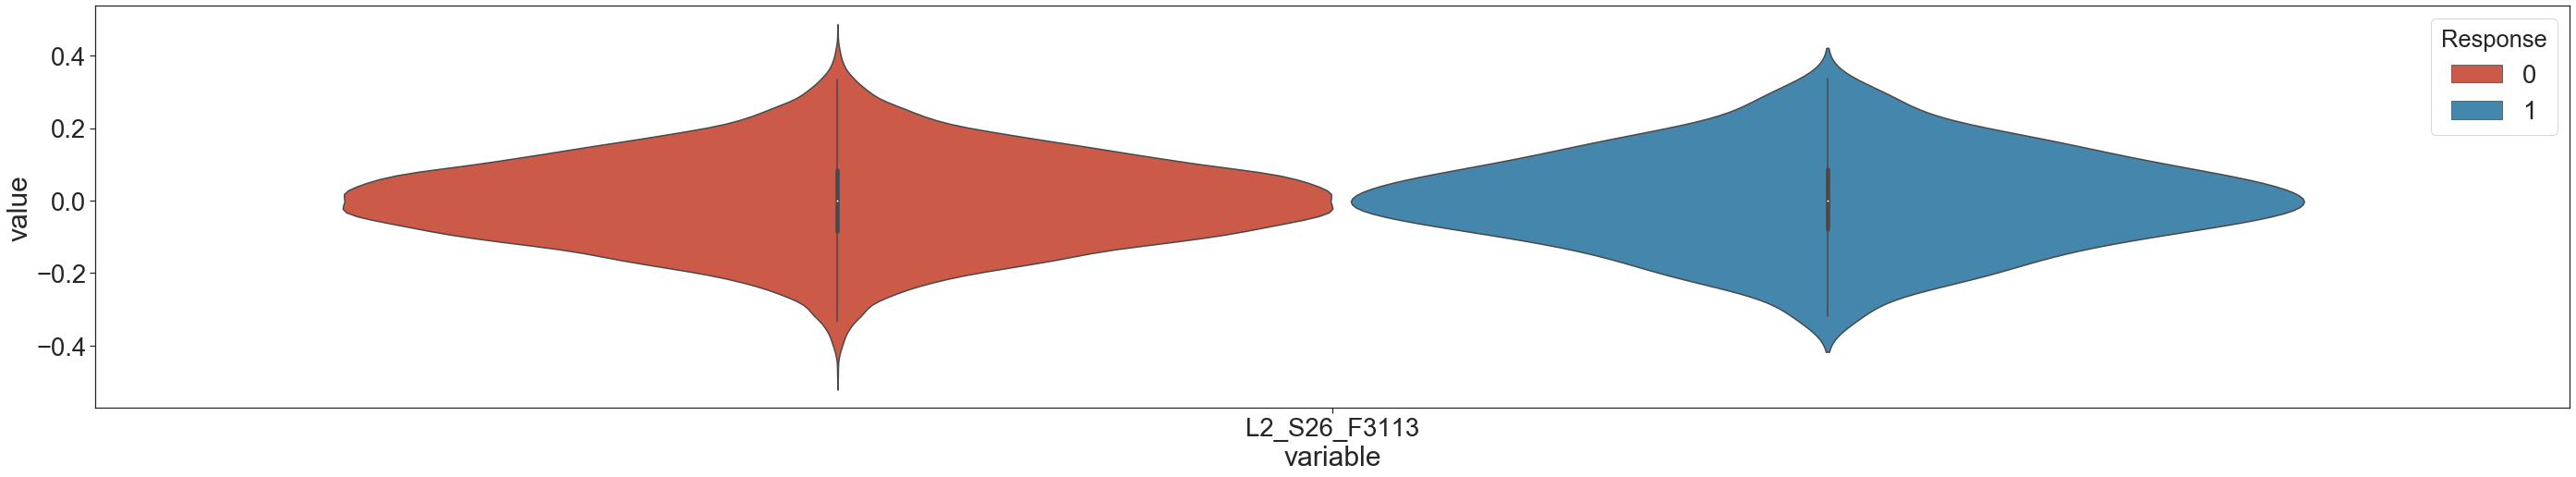

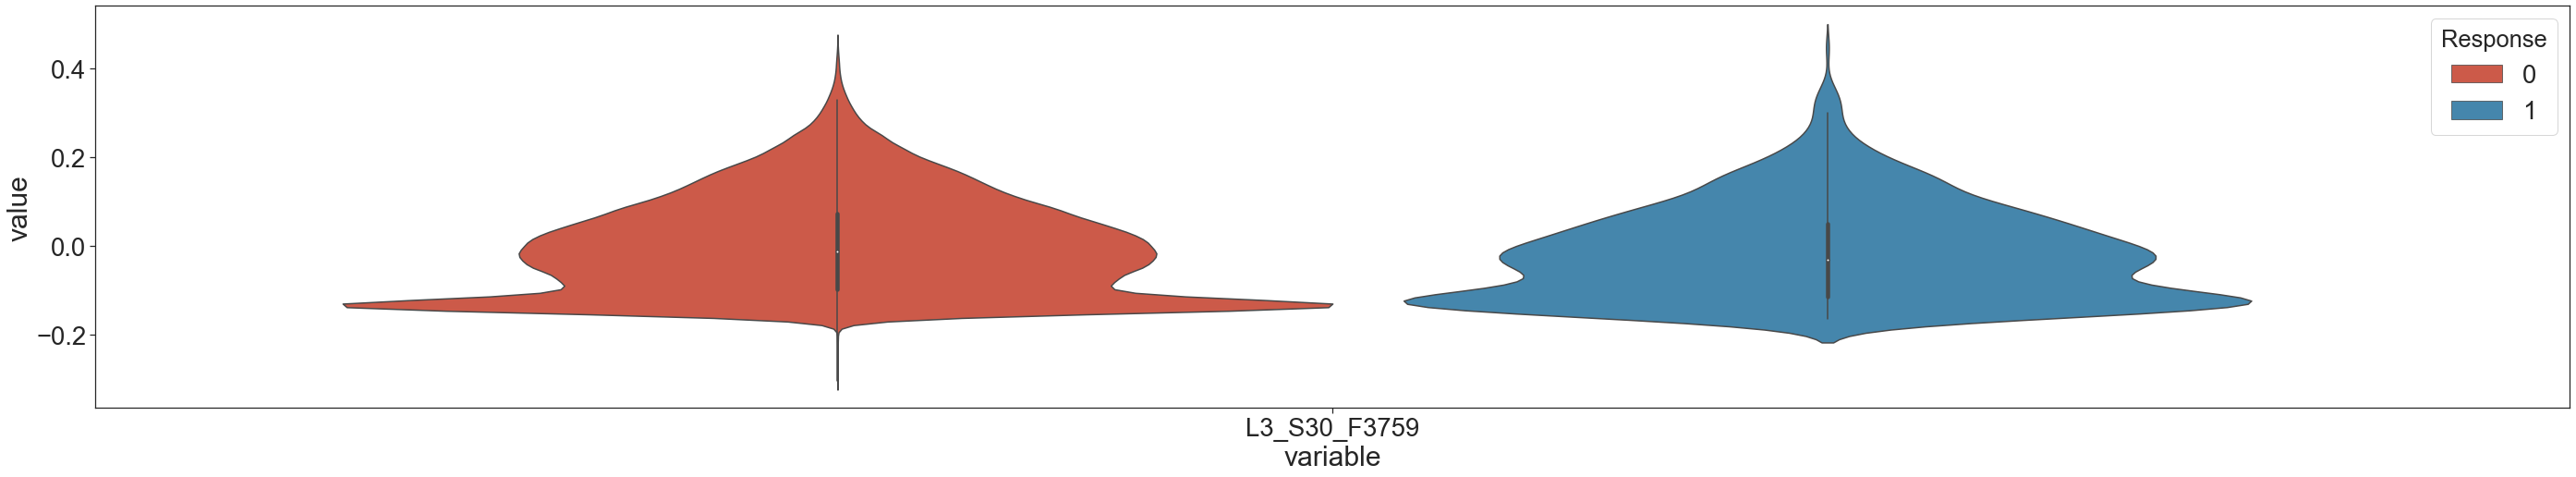

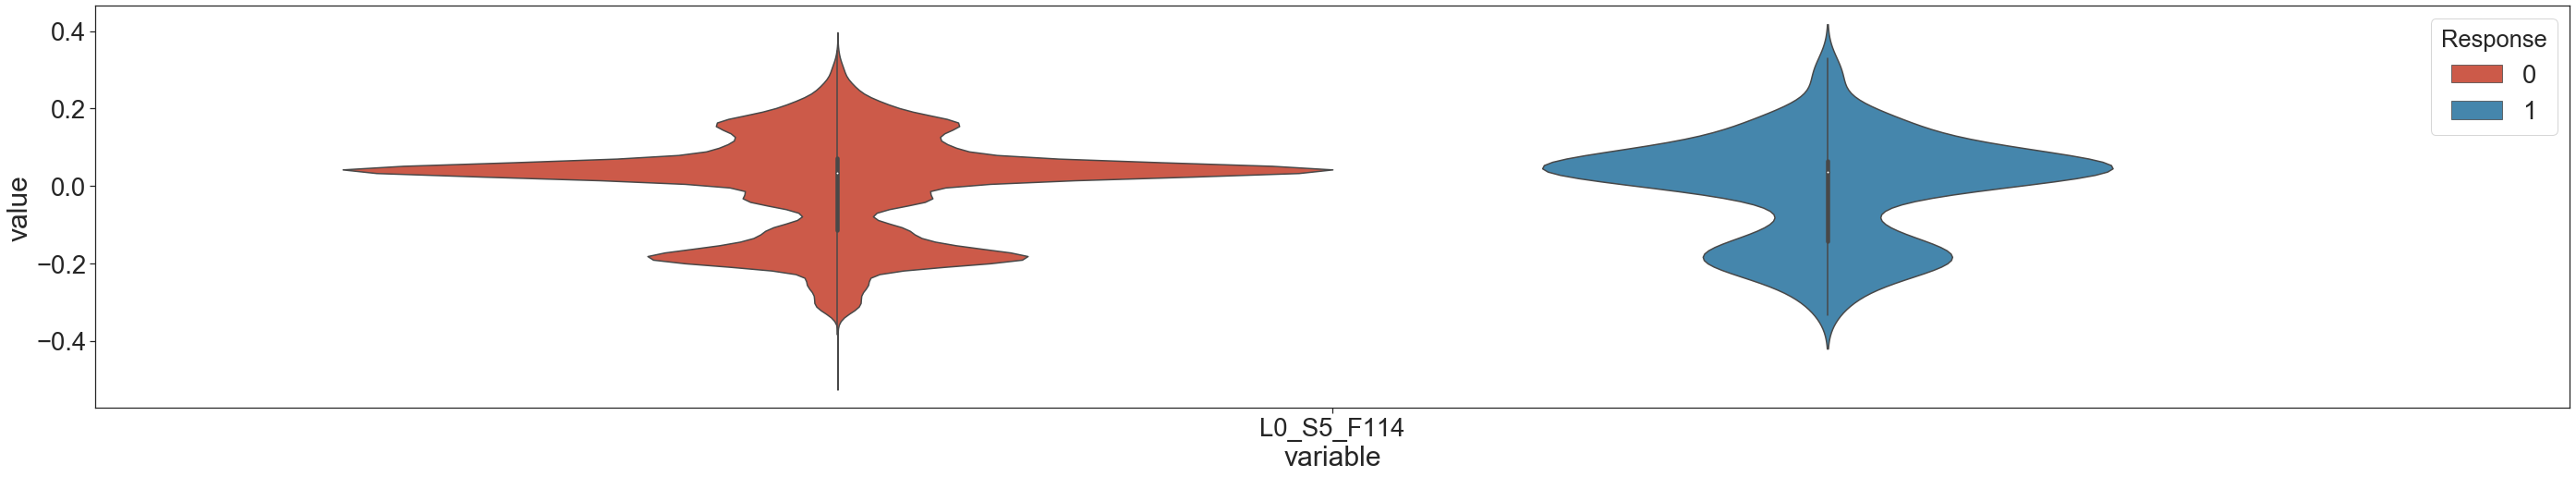

In [15]:
b_size = 1
train = train[feature_names + ['Response']]

for batch in list(range(0, train.shape[1] - 1, b_size)):
    a = train.columns[batch: batch + b_size].tolist()
    a.append('Response')
    train_batch =[pd.melt(train[a], id_vars = 'Response', value_vars = feature_names[batch: batch + b_size])]
    a = train_batch[0]
    fig_s = (48,8)
    _, axs = plt.subplots(figsize = fig_s)
    sns.set_style("ticks")
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 1.5})
    plt.cla()
    sns.violinplot(x='variable',  
                   y='value',
                   hue='Response', 
                   data=a,
                   orient='v',
                   ax=axs, 
                   scale='area',
                   lw=0.01,
                   split=False
    )


In [7]:
a = train_batch[0]

In [8]:
type(a)

pandas.core.frame.DataFrame

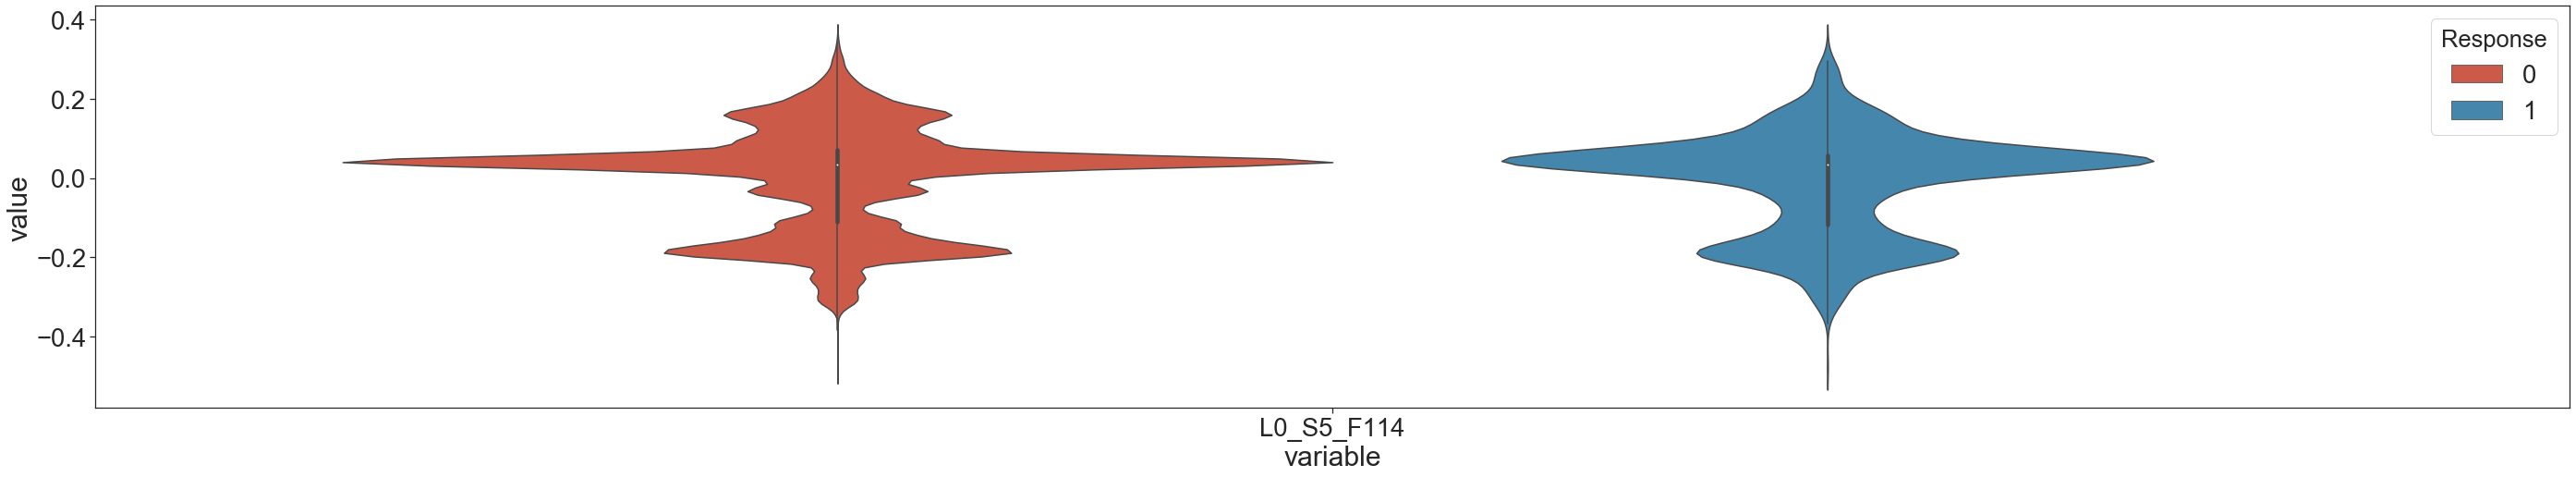

In [9]:
fig_s = (48,8)
_, axs = plt.subplots(figsize = fig_s)
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 1.5})
sns.violinplot(x='variable',  
               y='value',
               hue='Response', 
               data=a,
               orient='v',
               ax=axs, 
               scale='area',
               lw=0.01,
               split=False
)

In [219]:
lentrain_batch

[         Response    variable  value
 0               0  L0_S5_F114    NaN
 1               0  L0_S5_F114    NaN
 2               0  L0_S5_F114 -0.073
 3               0  L0_S5_F114    NaN
 4               0  L0_S5_F114    NaN
 5               0  L0_S5_F114    NaN
 6               0  L0_S5_F114    NaN
 7               0  L0_S5_F114    NaN
 8               0  L0_S5_F114    NaN
 9               0  L0_S5_F114    NaN
 10              0  L0_S5_F114    NaN
 11              0  L0_S5_F114  0.065
 12              0  L0_S5_F114    NaN
 13              0  L0_S5_F114    NaN
 14              0  L0_S5_F114  0.051
 15              0  L0_S5_F114    NaN
 16              0  L0_S5_F114    NaN
 17              0  L0_S5_F114  0.277
 18              0  L0_S5_F114    NaN
 19              0  L0_S5_F114    NaN
 20              0  L0_S5_F114    NaN
 21              0  L0_S5_F114    NaN
 22              0  L0_S5_F114    NaN
 23              0  L0_S5_F114  0.027
 24              0  L0_S5_F114    NaN
 25         

In [217]:
batch = 0
a = train.columns[batch: batch + b_size]
a

Index(['L1_S24_F1695'], dtype='object')

In [210]:
x = train.columns[batch: batch + b_size].tolist()
x.append('Response')

In [211]:
x

['L1_S24_F1695', 'Response']

In [164]:
value_vars = feature_names[batch: batch + b_size]
value_vars

['L1_S24_F1695']

In [165]:
train

,L1_S24_F1695,L1_S24_F1632,L3_S33_F3855,L1_S24_F1604,L3_S29_F3407,L1_S24_F1723,L3_S38_F3960,L3_S33_F3865,L3_S38_F3956,L3_S33_F3857,...,L1_S24_F1844,L3_S29_F3376,L0_S0_F22,L3_S33_F3859,L3_S38_F3952,L3_S30_F3754,L2_S26_F3113,L3_S30_F3759,L0_S5_F114,Response
Id,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,-0.119,NaN,-0.702,NaN,NaN,0.026,NaN,-0.102,...,NaN,0.036,-0.273,-0.048,NaN,0.091,NaN,0.275,NaN,0
6,NaN,NaN,-0.029,NaN,0.082,NaN,NaN,-0.047,NaN,-0.026,...,NaN,-0.015,NaN,-0.210,NaN,-0.079,NaN,-0.004,NaN,0
7,NaN,NaN,0.199,NaN,0.104,NaN,NaN,0.108,NaN,0.191,...,NaN,0.023,0.250,0.236,NaN,0.059,NaN,0.063,-0.073,0
9,NaN,NaN,0.017,NaN,0.063,NaN,NaN,0.035,NaN,0.031,...,NaN,0.030,-0.253,0.165,NaN,-0.173,NaN,-0.156,NaN,0
11,NaN,NaN,-0.074,NaN,0.101,NaN,NaN,-0.006,NaN,-0.049,...,NaN,-0.149,0.042,0.147,NaN,0.004,NaN,-0.129,NaN,0
13,NaN,NaN,0.017,NaN,0.082,NaN,NaN,-0.055,NaN,0.007,...,NaN,-0.060,-0.035,-0.221,NaN,0.110,NaN,0.117,NaN,0
14,NaN,NaN,0.017,NaN,0.104,NaN,NaN,-0.055,NaN,-0.001,...,NaN,0.055,NaN,-0.112,NaN,-0.157,NaN,-0.129,NaN,0
16,-0.007,NaN,-0.210,NaN,0.057,-0.006,NaN,-0.006,NaN,-0.193,...,-0.123,-0.021,NaN,0.004,NaN,-0.021,-0.064,-0.119,NaN,0
18,NaN,NaN,0.017,NaN,0.082,NaN,NaN,0.010,NaN,-0.006,...,NaN,-0.047,-0.220,-0.035,NaN,-0.087,NaN,-0.103,NaN,0


In [168]:
a = ['L1_S24_F1695']
a.append('Response')
x =train[a]
print(a)

['L1_S24_F1695', 'Response']


In [156]:
x

,L1_S24_F1632,Response
Id,,
4,NaN,0
6,NaN,0
7,NaN,0
9,NaN,0
11,NaN,0
13,NaN,0
14,NaN,0
16,NaN,0
18,NaN,0


In [54]:
import pandas as pd
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                  'B': {0: 1, 1: 3, 2: 5},
                  'C': {0: 2, 1: 4, 2: 6}})

In [57]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [56]:
pd.melt(df, id_vars=['A'], value_vars=['C'])

,A,variable,value
0,a,C,2
1,b,C,4
2,c,C,6
